### Projeto Previsão de preço dos Automóveis  (1 e 2 - Entendimento da área e do desafio)

### Nosso Objetivo

Desenvolver um projeto de ciência de dados capaz de prever o preço de um carro atráves de suas características. Quando se trata de determinar o preço de um carro , várias características são relevantes, ex: ano, motor hp, tipo de combustível , etc

Os dados para realizar esse projeto foram obtidos do site : (https://www.kaggle.com/CooperUnion/cardataset)

### Importar Bibliotecas e Bases de Dados (3 - Extração/Obtenção de Dados)

In [1]:
import pandas as pd
from forex_python.converter import CurrencyRates
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
base_carros = pd.read_csv('data.csv', sep=';')
display(base_carros)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


- Como os preços estão em dólarr, é preciso converte-los para R$ (real brasileiro) e substitui - los no nosso conjunto de dados.
- Converteremos MPG (milhas por galão) para KM/L (kilômetros por litro) nas colunas KM/L Estrada e KM/L Cidade.
- Também iremos renomear todas as colunas e as categorias de todas as colunas que tiverem.

### Renomeando e convertendo as Colunas.

In [3]:
def get_exchange_rate():
    c = CurrencyRates()
    exchange_rate = c.get_rate('USD', 'BRL')
    return exchange_rate

# Chamada da função para obter a taxa de câmbio
rate = get_exchange_rate()

print(f"A taxa de câmbio atual do dólar para o real é: {rate}")

display(base_carros)
base_carros['MSRP'] = base_carros['MSRP'] * rate
base_carros['MSRP'] = base_carros['MSRP'].round(2)

base_carros['highway MPG'] = base_carros['highway MPG'] * 0.4251437
base_carros['highway MPG'] = base_carros['highway MPG'].round(2)

base_carros['city mpg'] = base_carros['city mpg'] * 0.4251437
base_carros['city mpg'] = base_carros['city mpg'].round(2)
base_carros = base_carros.rename(columns={'highway MPG': 'KM/L Estrada', 'city mpg': 'KM/L Cidade', 'Make': 'Fabricante', 'Model': 'Modelo', 'Year': 'Ano', 
'Engine Fuel Type': 'Tipo de Combustivel', 'Engine HP': 'Motor HP', 'Engine Cylinders': 'Nº de Cilindros', 'Transmission Type': 'Tipo Transmissão',
'Driven_Wheels': 'Tração', 'Number of Doors': 'Nº de Portas', 'Market Category': 'Categoria de Mercado', 'Vehicle Size': 'Tamanho Veículo',
'Vehicle Style': 'Estilo Veículo', 'Popularity': 'Popularidade', 'MSRP': 'Preço Sugerido Fabricante'})




display(base_carros)


A taxa de câmbio atual do dólar para o real é: 4.913265306122448


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


,Fabricante,Modelo,Ano,Tipo de Combustivel,Motor HP,Nº de Cilindros,Tipo Transmissão,Tração,Nº de Portas,Categoria de Mercado,Tamanho Veículo,Estilo Veículo,KM/L Estrada,KM/L Cidade,Popularidade,Preço Sugerido Fabricante
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,11.05,8.08,3916,226673.49
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,11.90,8.08,3916,199724.23
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,11.90,8.50,3916,178597.19
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,11.90,7.65,3916,144695.66
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,11.90,7.65,3916,169507.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,9.78,6.80,204,226599.80
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,9.78,6.80,204,278434.74
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,9.78,6.80,204,248709.49
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,9.78,6.80,204,250183.47


### Renomeando as categorias da coluna Tipo de Combustivel

In [4]:
base_carros['Tipo de Combustivel'] = base_carros['Tipo de Combustivel'].astype('category')
display(base_carros.dtypes)

display(base_carros['Tipo de Combustivel'].value_counts())

renomear_combustivel = { 'regular unleaded': 'Gasolina Comum',
                        'premium unleaded (recommended)': 'Gasolina Premium Recomendada',
                        'premium unleaded (required)': 'Gasolina Premium Obrigatoria',
                        'flex-fuel (unleaded/E85)': 'Flex 01 (Gasolina / Etanol)',
                        'flex-fuel (premium unleaded recommended/E85)': 'Flex 02 (Gasolina / Etanol)',
                         'flex-fuel (premium unleaded required/E85)': 'Flex 03' '(Gasolina / Etanol)',
                        'natural gas': 'Gas Natural',
                       'electric': 'Eletrico',
                       'flex-fuel (unleaded/natural gas)': 'Flex (Gasolina / Gas Natural)',}

base_carros['Tipo de Combustivel'] = base_carros['Tipo de Combustivel'].cat.rename_categories(renomear_combustivel)
base_carros['Tipo de Combustivel'] = base_carros['Tipo de Combustivel'].astype('object')

display(base_carros.dtypes)

base_carros['Tipo de Combustivel'].value_counts()

Fabricante                     object
Modelo                         object
Ano                             int64
Tipo de Combustivel          category
Motor HP                      float64
Nº de Cilindros               float64
Tipo Transmissão               object
Tração                         object
Nº de Portas                  float64
Categoria de Mercado           object
Tamanho Veículo                object
Estilo Veículo                 object
KM/L Estrada                  float64
KM/L Cidade                   float64
Popularidade                    int64
Preço Sugerido Fabricante     float64
dtype: object

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Tipo de Combustivel, dtype: int64

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Categoria de Mercado          object
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

Gasolina Comum                   7172
Gasolina Premium Obrigatoria     2009
Gasolina Premium Recomendada     1523
Flex 01 (Gasolina / Etanol)       899
diesel                            154
Eletrico                           66
Flex 03(Gasolina / Etanol)         54
Flex 02 (Gasolina / Etanol)        26
Flex (Gasolina / Gas Natural)       6
Gas Natural                         2
Name: Tipo de Combustivel, dtype: int64

### Renomeando as categorias da coluna Tipo Transmissão

In [5]:
base_carros['Tipo Transmissão'] = base_carros['Tipo Transmissão'].astype('category')
display(base_carros.dtypes)

display(base_carros['Tipo Transmissão'].value_counts())

renomear_transmissao = {'AUTOMATIC': 'Automático',
                        'AUTOMATED_MANUAL': 'Automático e Manual',
                        'DIRECT_DRIVE': 'Transmissao Direta',
                        'UNKNOWN': 'Desconhecido', }

base_carros['Tipo Transmissão'] = base_carros['Tipo Transmissão'].cat.rename_categories(renomear_transmissao)
base_carros['Tipo Transmissão'] = base_carros['Tipo Transmissão'].astype('object')

display(base_carros.dtypes)

base_carros['Tipo Transmissão'].value_counts()

Fabricante                     object
Modelo                         object
Ano                             int64
Tipo de Combustivel            object
Motor HP                      float64
Nº de Cilindros               float64
Tipo Transmissão             category
Tração                         object
Nº de Portas                  float64
Categoria de Mercado           object
Tamanho Veículo                object
Estilo Veículo                 object
KM/L Estrada                  float64
KM/L Cidade                   float64
Popularidade                    int64
Preço Sugerido Fabricante     float64
dtype: object

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Tipo Transmissão, dtype: int64

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Categoria de Mercado          object
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

Automático             8266
MANUAL                 2935
Automático e Manual     626
Transmissao Direta       68
Desconhecido             19
Name: Tipo Transmissão, dtype: int64

### Renomeando as categrorias da coluna Tração

In [6]:
base_carros['Tração'] = base_carros['Tração'].astype('category')
display(base_carros.dtypes)

display(base_carros['Tração'].value_counts())

renomear_tracao = {'front wheel drive': 'tracao dianteira',
                    'rear wheel drive': 'tracao traseira',
                    'all wheel drive':  'tracao em todas as rodas',
                    'four wheel drive': 'tracao nas 4 rodas',
                   }

base_carros['Tração'] = base_carros['Tração'].cat.rename_categories(renomear_tracao)
base_carros['Tração'] = base_carros['Tração'].astype('object')

display(base_carros.dtypes)

base_carros['Tração'].value_counts()

Fabricante                     object
Modelo                         object
Ano                             int64
Tipo de Combustivel            object
Motor HP                      float64
Nº de Cilindros               float64
Tipo Transmissão               object
Tração                       category
Nº de Portas                  float64
Categoria de Mercado           object
Tamanho Veículo                object
Estilo Veículo                 object
KM/L Estrada                  float64
KM/L Cidade                   float64
Popularidade                    int64
Preço Sugerido Fabricante     float64
dtype: object

front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: Tração, dtype: int64

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Categoria de Mercado          object
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

tracao dianteira            4787
tracao traseira             3371
tracao em todas as rodas    2353
tracao nas 4 rodas          1403
Name: Tração, dtype: int64

### Renomeando as categrorias da coluna Tamanho Veículo

In [7]:
base_carros['Tamanho Veículo'] = base_carros['Tamanho Veículo'].astype('category')

display(base_carros.dtypes)
display(base_carros['Tamanho Veículo'].value_counts())

renomear_tamanho = {'Compact': 'Pequeno',
                    'Midsize': 'Medio',
                    'Large': 'Grande', }

base_carros['Tamanho Veículo'] = base_carros['Tamanho Veículo'].cat.rename_categories(renomear_tamanho)
base_carros['Tamanho Veículo'] = base_carros['Tamanho Veículo'].astype('object')


display(base_carros.dtypes)
base_carros['Tamanho Veículo'].value_counts()

Fabricante                     object
Modelo                         object
Ano                             int64
Tipo de Combustivel            object
Motor HP                      float64
Nº de Cilindros               float64
Tipo Transmissão               object
Tração                         object
Nº de Portas                  float64
Categoria de Mercado           object
Tamanho Veículo              category
Estilo Veículo                 object
KM/L Estrada                  float64
KM/L Cidade                   float64
Popularidade                    int64
Preço Sugerido Fabricante     float64
dtype: object

Compact    4764
Midsize    4373
Large      2777
Name: Tamanho Veículo, dtype: int64

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Categoria de Mercado          object
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

Pequeno    4764
Medio      4373
Grande     2777
Name: Tamanho Veículo, dtype: int64

### Renomeando as categrorias da coluna Estilo Veículo

In [8]:
base_carros['Estilo Veículo'] = base_carros['Estilo Veículo'].astype('category')

display(base_carros.dtypes)
display(base_carros['Estilo Veículo'].value_counts())

renomear_estilos = {
    'Sedan': 'Sedã',
    '4dr SUV': 'SUV de 4 portas',
    'Coupe': 'Cupê',
    'Crew Cab Pickup': 'Picape Cabine Dupla',
    'Extended Cab Pickup': 'Picape Cabine Estendida',
    'Wagon': 'Perua',
    '4dr Hatchback': 'Hatchback de 4 portas',
    'Convertible': 'Conversível',
    '2dr Hatchback': 'Hatchback de 2 portas',
    'Passenger Minivan': 'Minivan de Passageiros',
    'Regular Cab Pickup': 'Picape Cabine Simples',
    '2dr SUV': 'SUV de 2 portas',
    'Passenger Van': 'Van de Passageiros',
    'Cargo Van': 'Van de Carga',
    'Cargo Minivan': 'Minivan de Carga',
    'Convertible SUV': 'SUV Conversível'
}

base_carros['Estilo Veículo'] = base_carros['Estilo Veículo'].cat.rename_categories(renomear_estilos)
base_carros['Estilo Veículo'] = base_carros['Estilo Veículo'].astype('object')


display(base_carros.dtypes)
base_carros['Estilo Veículo'].value_counts()

Fabricante                     object
Modelo                         object
Ano                             int64
Tipo de Combustivel            object
Motor HP                      float64
Nº de Cilindros               float64
Tipo Transmissão               object
Tração                         object
Nº de Portas                  float64
Categoria de Mercado           object
Tamanho Veículo                object
Estilo Veículo               category
KM/L Estrada                  float64
KM/L Cidade                   float64
Popularidade                    int64
Preço Sugerido Fabricante     float64
dtype: object

Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: Estilo Veículo, dtype: int64

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Categoria de Mercado          object
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

Sedã                       3048
SUV de 4 portas            2488
Cupê                       1211
Conversível                 793
Hatchback de 4 portas       702
Picape Cabine Dupla         681
Picape Cabine Estendida     623
Perua                       592
Hatchback de 2 portas       506
Minivan de Passageiros      417
Picape Cabine Simples       392
SUV de 2 portas             138
Van de Passageiros          128
Van de Carga                 95
Minivan de Carga             71
SUV Conversível              29
Name: Estilo Veículo, dtype: int64

### 4 - Ajustes dos dados (Limpeza dos Dados)

In [9]:
display(base_carros.dtypes)

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Categoria de Mercado          object
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

### Agora vamos começar os tratamentos

- Vamos olhar nossa base de dados para decidir se há alguma cooluna nao relevante para o nosso modelo a excluí-las.
- Tipos de colunas que vamos excluir:
    1. IDs, Links e informações não relevantes para o modelo
    2. Colunas repetidas ou extremamente parecidas com outra (que dão a mesma informação para o modelo. Ex: Data x Ano/Mês
    3. Colunas preenchidas com texto livre -> Não rodaremos nenhuma análise de palavras ou algo do tipo
    4. Colunas em que todos ou quase todos os valores são iguais
    
- Para isso, vamos criar um arquivo em excel com o nome : 'Análise das colunas' e fazer uma análise qualitativa, olhando as colunas e identificando quais são desnecessárias

In [10]:
base_carros.to_csv('Análise das colunas.csv', sep=';', encoding='latin1')

- Por enquanto ficaremos com todas as colunas

### Tratando valores faltando

In [11]:
display(base_carros.shape)
display(base_carros.isnull().sum())
display(base_carros['Categoria de Mercado'].value_counts())

(11914, 16)

Fabricante                      0
Modelo                          0
Ano                             0
Tipo de Combustivel             3
Motor HP                       69
Nº de Cilindros                30
Tipo Transmissão                0
Tração                          0
Nº de Portas                    6
Categoria de Mercado         3742
Tamanho Veículo                 0
Estilo Veículo                  0
KM/L Estrada                    0
KM/L Cidade                     0
Popularidade                    0
Preço Sugerido Fabricante       0
dtype: int64

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: Categoria de Mercado, Length: 71, dtype: int64

- A coluna Categoria de Mercado há uma grande quantidade de linhas faltando (+ de 30%), vamos retirar esta coluna da análise.
Ja as outras colunas , vamos excluir somente as linhas vazias

In [12]:
display(base_carros.shape)
base_carros = base_carros.drop('Categoria de Mercado', axis=1)
display(base_carros.shape)

base_carros = base_carros.dropna()
display(base_carros)




(11914, 16)

(11914, 15)

,Fabricante,Modelo,Ano,Tipo de Combustivel,Motor HP,Nº de Cilindros,Tipo Transmissão,Tração,Nº de Portas,Tamanho Veículo,Estilo Veículo,KM/L Estrada,KM/L Cidade,Popularidade,Preço Sugerido Fabricante
0,BMW,1 Series M,2011,Gasolina Premium Obrigatoria,335.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.05,8.08,3916,226673.49
1,BMW,1 Series,2011,Gasolina Premium Obrigatoria,300.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Conversível,11.90,8.08,3916,199724.23
2,BMW,1 Series,2011,Gasolina Premium Obrigatoria,300.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.90,8.50,3916,178597.19
3,BMW,1 Series,2011,Gasolina Premium Obrigatoria,230.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.90,7.65,3916,144695.66
4,BMW,1 Series,2011,Gasolina Premium Obrigatoria,230.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Conversível,11.90,7.65,3916,169507.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,226599.80
11910,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,278434.74
11911,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,248709.49
11912,Acura,ZDX,2013,Gasolina Premium Recomendada,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,250183.47


### Verificando o tipo de dados em cada coluna

In [13]:
display(base_carros.dtypes)
display(base_carros.iloc[0])

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Popularidade                   int64
Preço Sugerido Fabricante    float64
dtype: object

Fabricante                                            BMW
Modelo                                         1 Series M
Ano                                                  2011
Tipo de Combustivel          Gasolina Premium Obrigatoria
Motor HP                                            335.0
Nº de Cilindros                                       6.0
Tipo Transmissão                                   MANUAL
Tração                                    tracao traseira
Nº de Portas                                          2.0
Tamanho Veículo                                   Pequeno
Estilo Veículo                                       Cupê
KM/L Estrada                                        11.05
KM/L Cidade                                          8.08
Popularidade                                         3916
Preço Sugerido Fabricante                       226673.49
Name: 0, dtype: object

### Análise Exploratória e Tratar Outliers (5 - Análise Exploratória)

- Vamos basicamente olhar feature por feature (coluna) para:
    1. Ver a correlação entre as features e decidir se manteremos todas as features que temos.
    2. Excluir outliers (usaremos como regra, valores abaixo de Q1 - 1.5xAmplitude e valores acima de Q3 + 1.5x Amplitude). Amplitude = Q3 - Q1
    3. Confirmar se todas as features que temos fazem realmente sentido para o nosso modelo ou se alguma delas não vai nos ajudar e se devemos excluir
    
- Vamos começar pela coluna de preço (resultado final que queremos).

- Depois vamos analisar as colunas de valores numéricos discretos(valores que vao de 1 em 1) (accomodates, bedrooms, guests_included, etc.)

- Por fim, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

<AxesSubplot:>

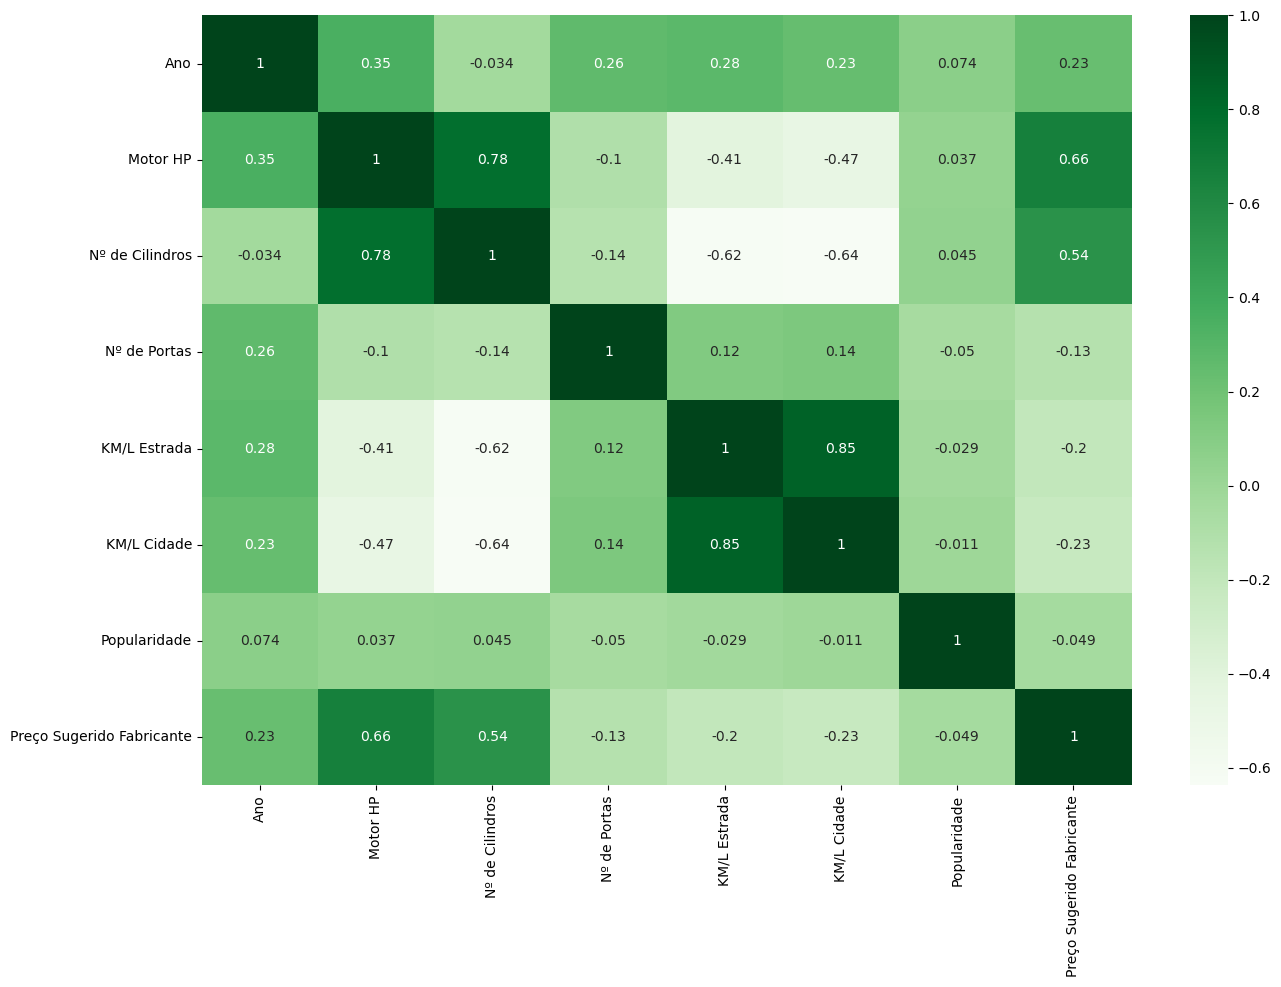

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(base_carros.corr(), annot=True, cmap= 'Greens')

- Foi constatado que as colunas KM/L Estrada e KM/L Cidade tem uma correlação muito forte , portanto analisaremos elas mais a fundo.
- O mesmo iremos fazer para as colunas Motor HP e Nº de Cilindros.

Text(0.5, 1.0, 'Relação entre KM/L Estrada e KM/L Cidade')

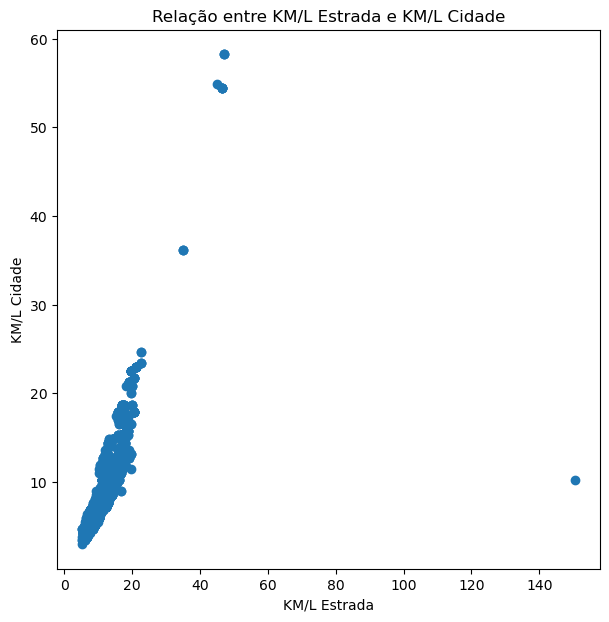

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(base_carros['KM/L Estrada'], base_carros['KM/L Cidade'])
plt.xlabel('KM/L Estrada')
plt.ylabel('KM/L Cidade')
plt.title('Relação entre KM/L Estrada e KM/L Cidade')


In [16]:
from sklearn.linear_model import LinearRegression

X = base_carros[['KM/L Estrada']]
y = base_carros['KM/L Cidade']

model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)

print("Coeficiente de Determinação (R²):", r_squared)

Coeficiente de Determinação (R²): 0.7174030199304758


In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Adicionar uma coluna constante ao conjunto de dados
features = ['KM/L Estrada', 'KM/L Cidade']
X = sm.add_constant(base_carros[features])

# Calcular o VIF para cada feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir os resultados
display(vif)

,Features,VIF
0,const,13.506287
1,KM/L Estrada,3.538608
2,KM/L Cidade,3.538608


Analisando as duas colunas, obtivemos um coeficiente de determinação (R²) de 0,71, ou seja, uma coluna pode explicar 71% dos dados da outra coluna, um número razoavelmente bom.

Também foi realizada a análise da multicolinearidade entre as colunas usando o método VIF (fator de inflação da variância), que indica o quanto a variância da regressão de uma feature é inflada devido à multicolinearidade com a outra feature. Valores abaixo de 5 são considerados aceitáveis para mantermos as duas colunas no projeto. Nossas features deram um VIF de 3,53

Concluindo, vamos manter as features 'KM/L Estrada' e 'KM/L Cidade'.

In [18]:
X = base_carros[['Motor HP']]
y = base_carros['Nº de Cilindros']

model = LinearRegression()
model.fit(X, y)
r_squared = model.score(X, y)

print("Coeficiente de Determinação (R²):", r_squared)

Coeficiente de Determinação (R²): 0.6081845585001033


In [19]:
# Adicionar uma coluna constante ao conjunto de dados
features = ['Motor HP', 'Nº de Cilindros']
X = sm.add_constant(base_carros[features])

# Calcular o VIF para cada feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exibir os resultados
display(vif)

,Features,VIF
0,const,11.538491
1,Motor HP,2.552222
2,Nº de Cilindros,2.552222


Analisando as duas colunas, obtivemos um coeficiente de determinação (R²) de 0,60, ou seja, uma coluna pode explicar 60% dos dados da outra coluna, um número razoavelmente bom.

Também foi realizada a análise da multicolinearidade entre as colunas usando o método VIF (fator de inflação da variância), que indica o quanto a variância da regressão de uma feature é inflada devido à multicolinearidade com a outra feature. Valores abaixo de 5 são considerados aceitáveis para mantermos as duas colunas no projeto. Nossas features deram um VIF de 2,55

Concluindo, vamos manter as features 'Motor HP' e 'Nº de Cilindros'

### Definição de Funções para Análise de Outliers

Vamos definir algumas funções para ajudar na análise de outliers das colunas

In [20]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

In [21]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))
    
def grafico_contagem(df,coluna, nome_coluna):
    coluna = coluna.value_counts()
    modelo_decrecente = coluna.sort_values(ascending=False)
    plt.figure(figsize=(15, 5))
    grafico = sns.countplot(nome_coluna, data= df, order= modelo_decrecente.index)
    grafico.tick_params(axis='x', rotation=90)



### Tratando colunas numéricas

### Preço Sugerido Fabricante

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


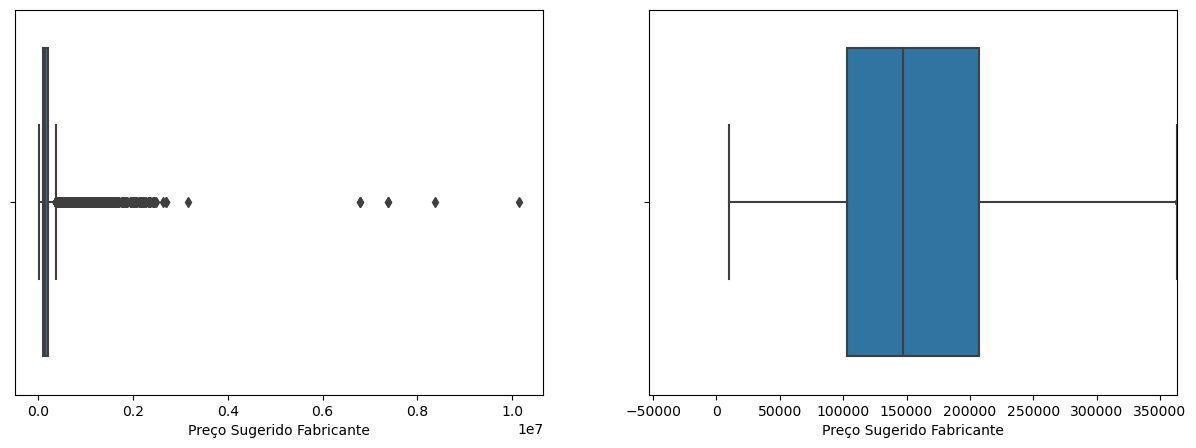

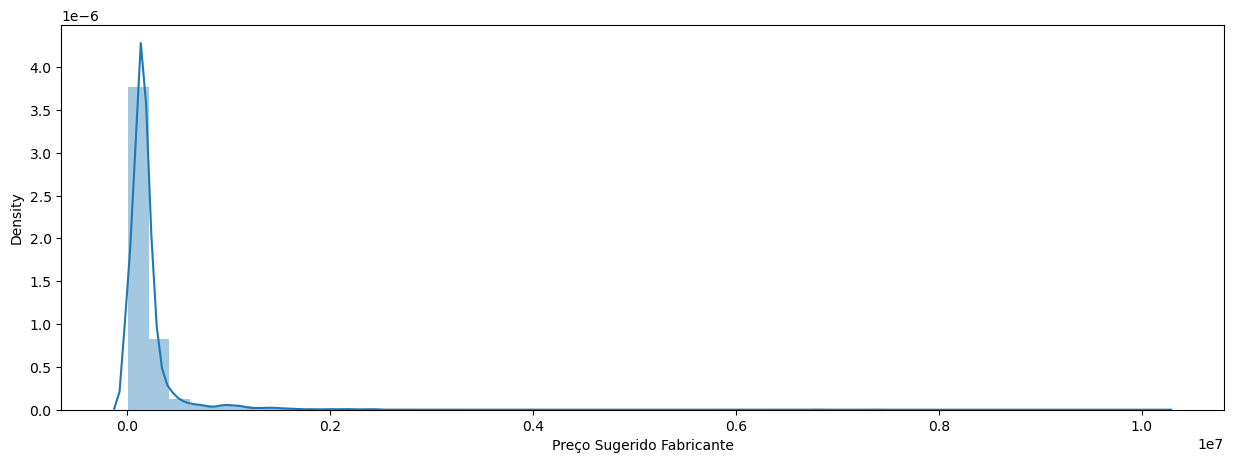

In [22]:
diagrama_caixa(base_carros['Preço Sugerido Fabricante'])
histograma(base_carros['Preço Sugerido Fabricante'])


In [23]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'Preço Sugerido Fabricante')
print('{} linhas removidas'.format(linhas_removidas))

982 linhas removidas


(10830, 15)


C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


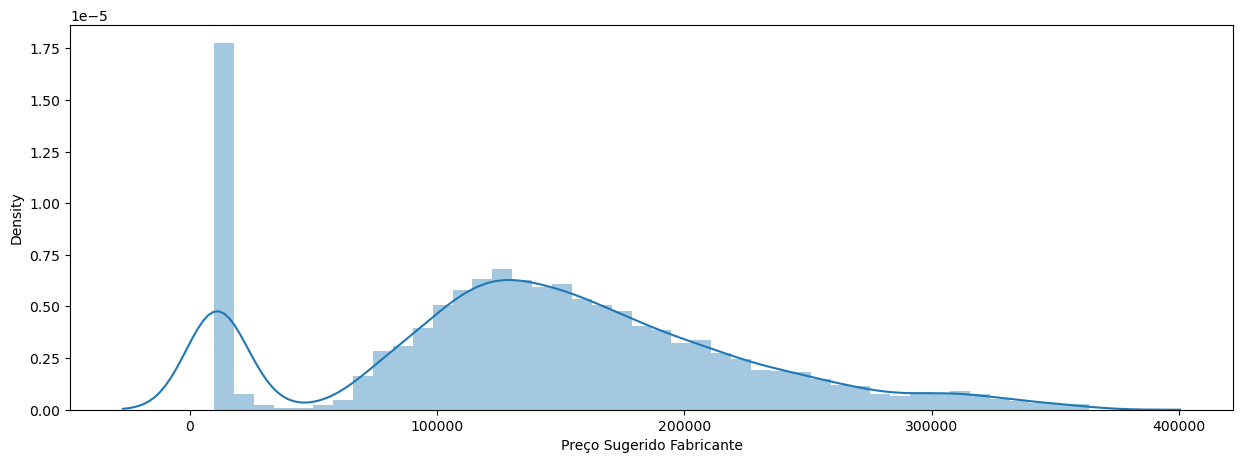

In [24]:
histograma(base_carros['Preço Sugerido Fabricante'])
print(base_carros.shape)

### Motor HP

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


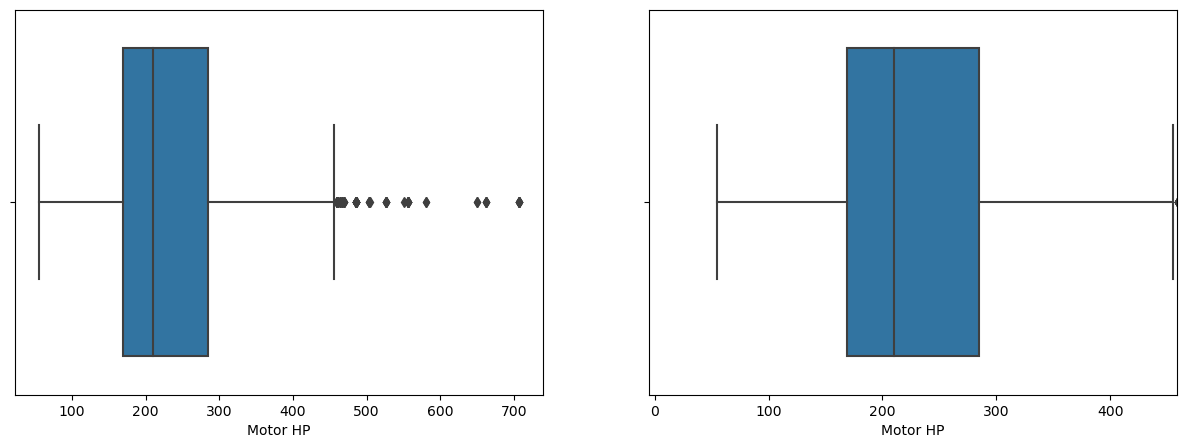

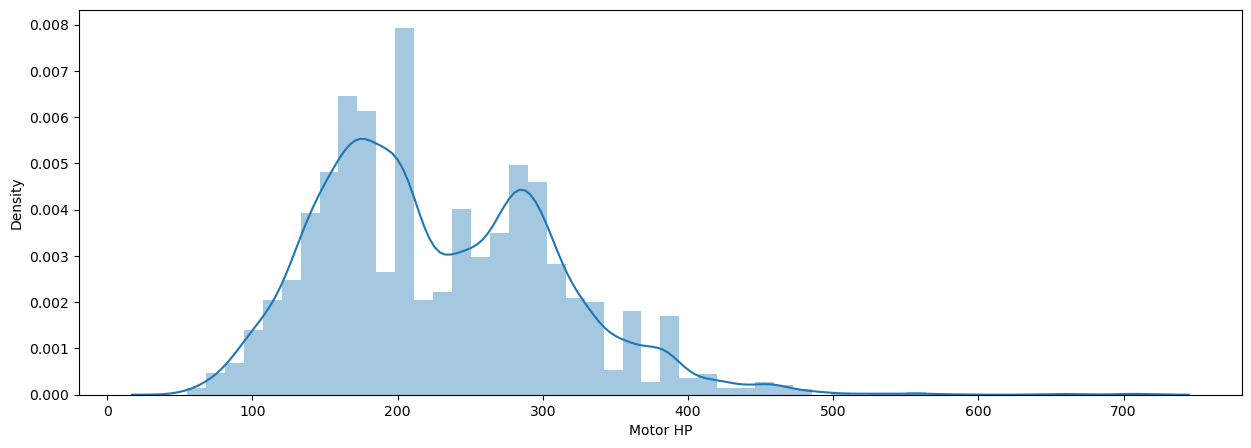

In [25]:
diagrama_caixa(base_carros['Motor HP'])
histograma(base_carros['Motor HP'])

In [26]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'Motor HP')
print('{} linhas removidas'.format(linhas_removidas))

80 linhas removidas


(10750, 15)


C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


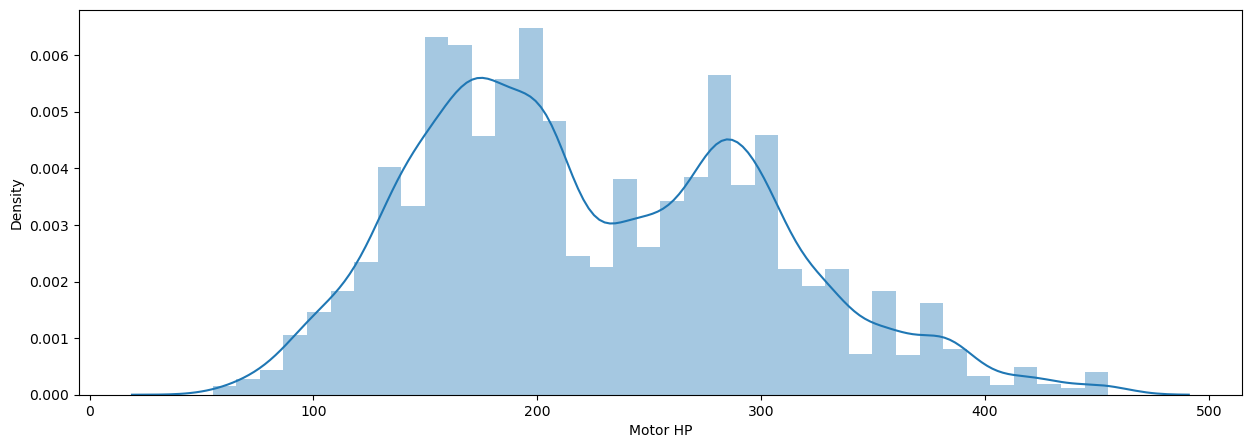

In [27]:
histograma(base_carros['Motor HP'])
print(base_carros.shape)

### Nº de Cilindros

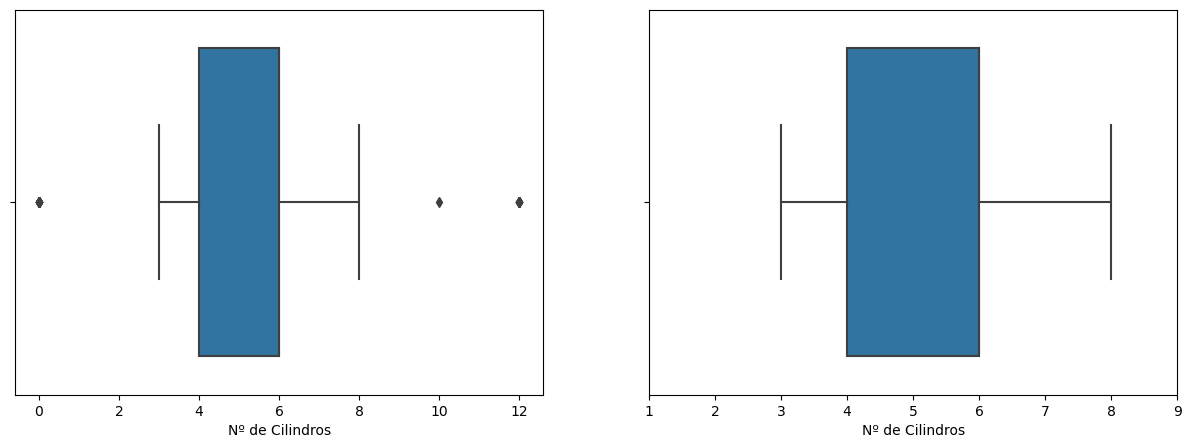

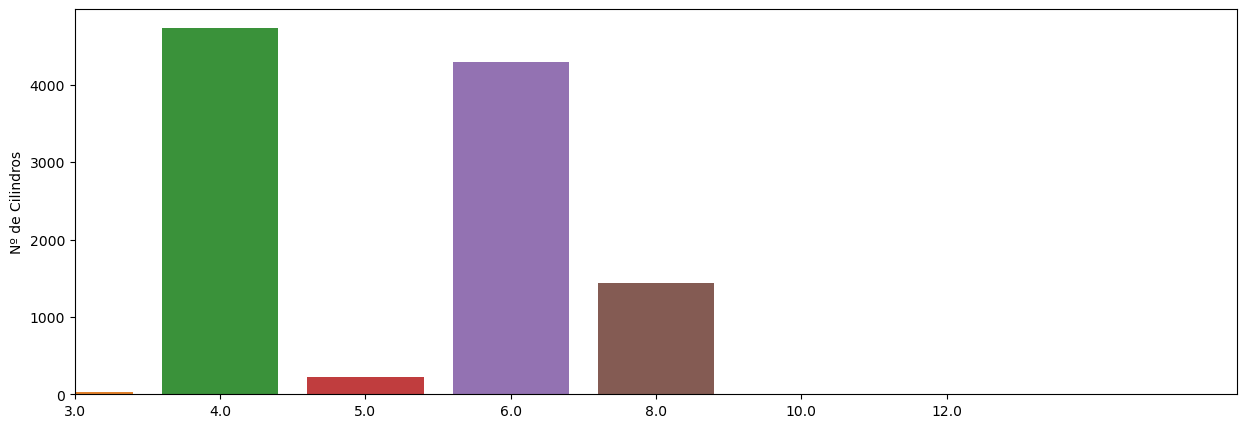

In [28]:
diagrama_caixa(base_carros['Nº de Cilindros'])
grafico_barra(base_carros['Nº de Cilindros'])

In [29]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'Nº de Cilindros')
print('{} linhas removidas'.format(linhas_removidas))

22 linhas removidas


(10728, 15)


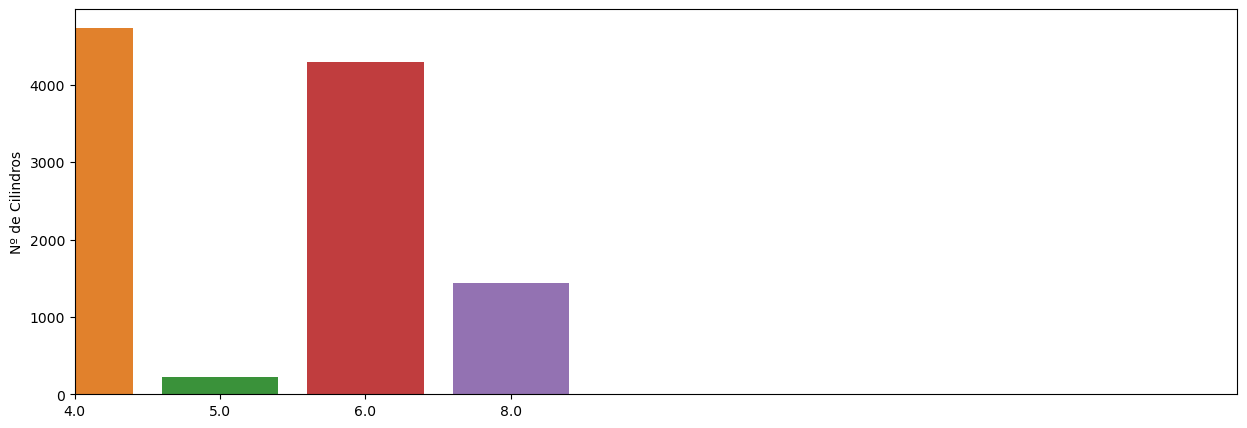

In [30]:
grafico_barra(base_carros['Nº de Cilindros'])
print(base_carros.shape)

### Nº de Portas

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


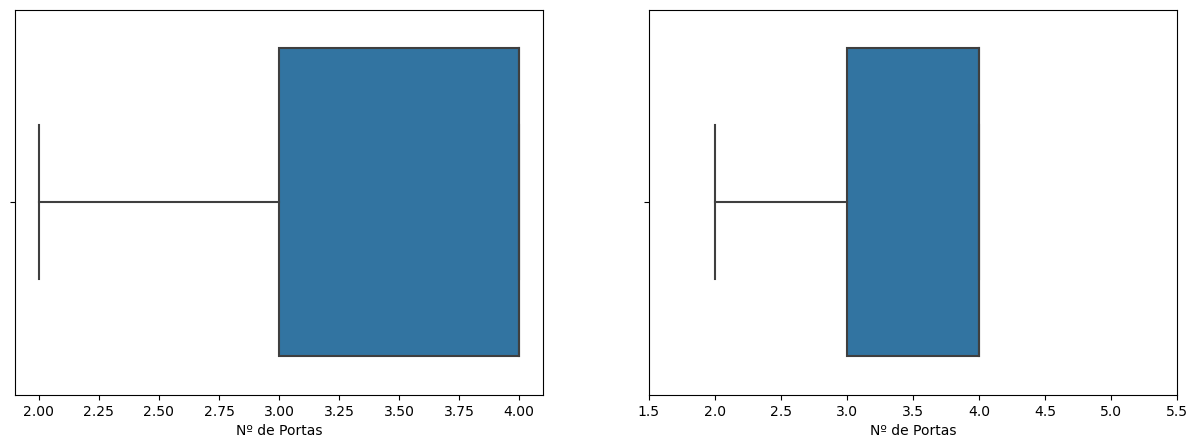

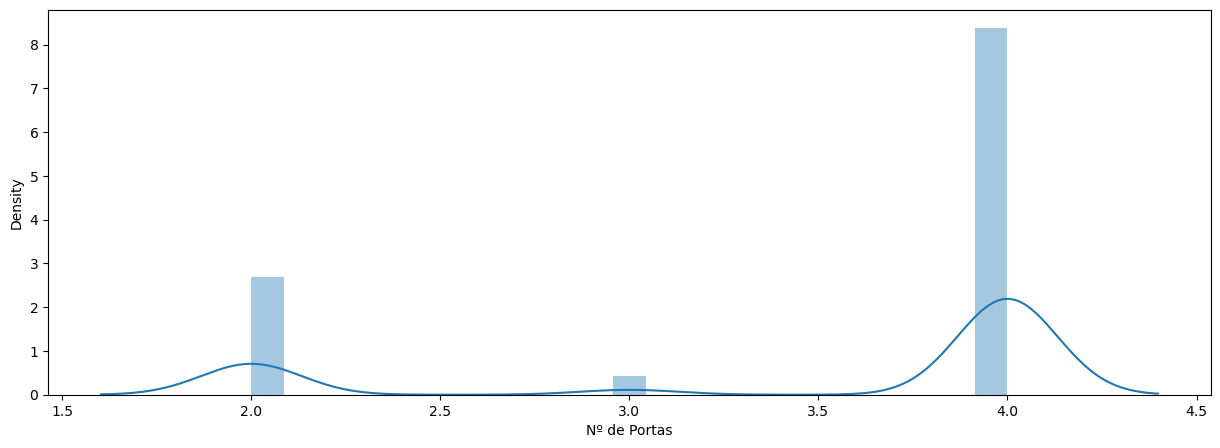

In [31]:
diagrama_caixa(base_carros['Nº de Portas'])
histograma(base_carros['Nº de Portas'])

In [32]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'Nº de Portas')
print('{} linhas removidas'.format(linhas_removidas))

0 linhas removidas


- Numero de portas nao tem outliers, portanto nenhuma linha foi excluida

### KM/L Estrada

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


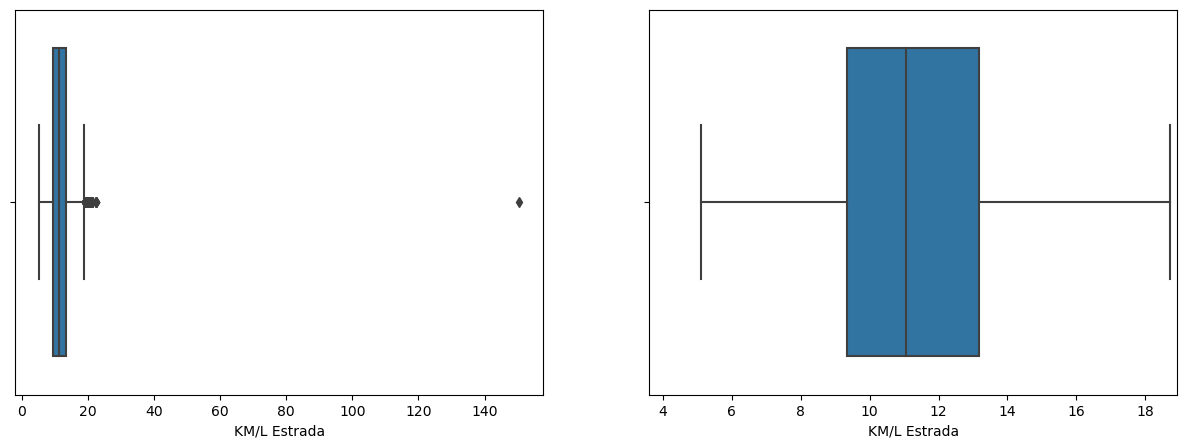

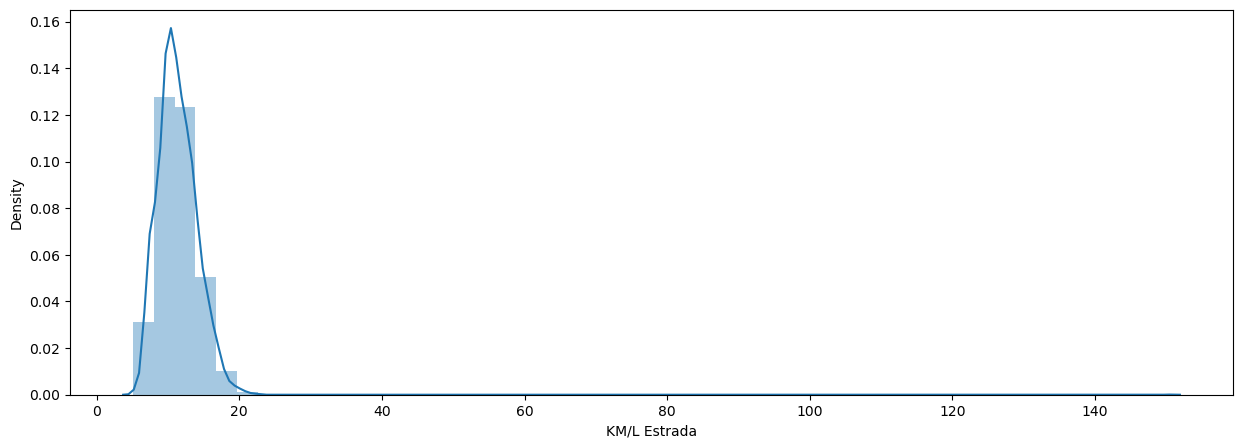

In [33]:
diagrama_caixa(base_carros['KM/L Estrada'])
histograma(base_carros['KM/L Estrada'])

In [34]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'KM/L Estrada')
print('{} linhas removidas'.format(linhas_removidas))

74 linhas removidas


(10654, 15)


C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


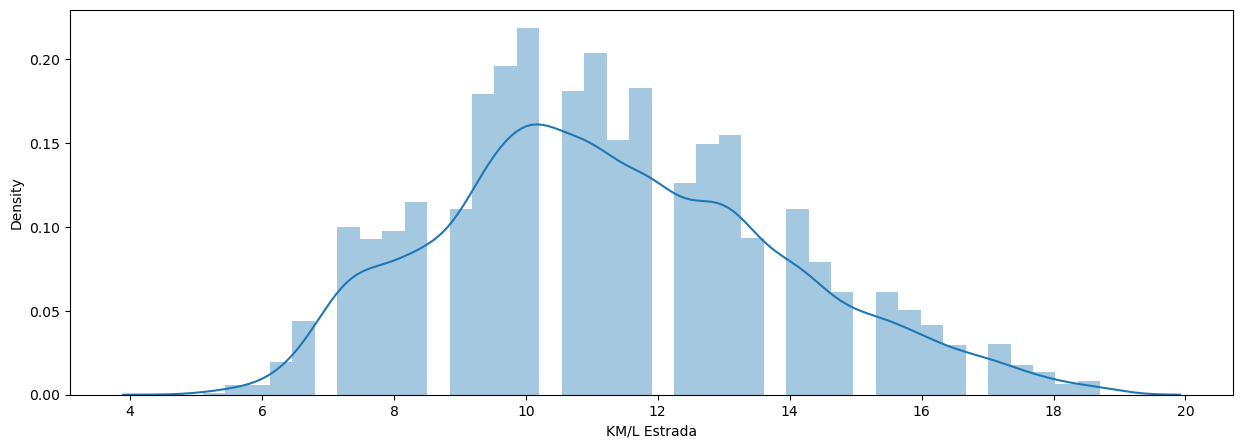

In [35]:
histograma(base_carros['KM/L Estrada'])
print(base_carros.shape)

### KM/L Cidade

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


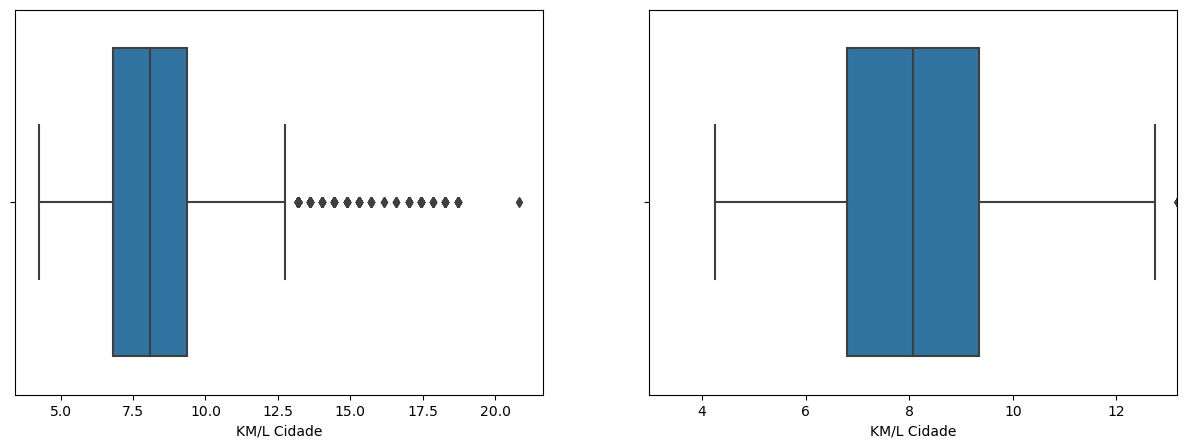

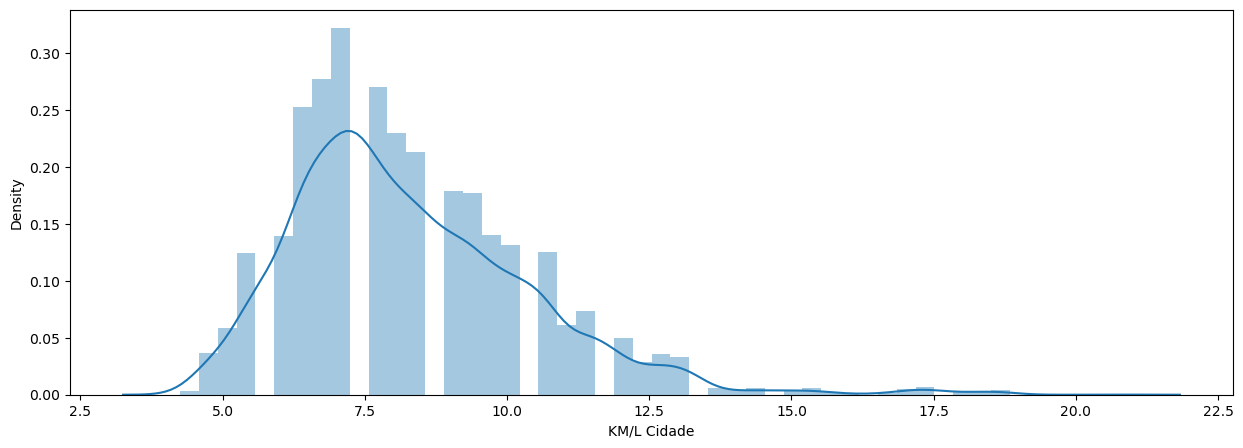

In [36]:
diagrama_caixa(base_carros['KM/L Cidade'])
histograma(base_carros['KM/L Cidade'])


In [37]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'KM/L Cidade')
print('{} linhas removidas'.format(linhas_removidas))

299 linhas removidas


(10355, 15)


C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


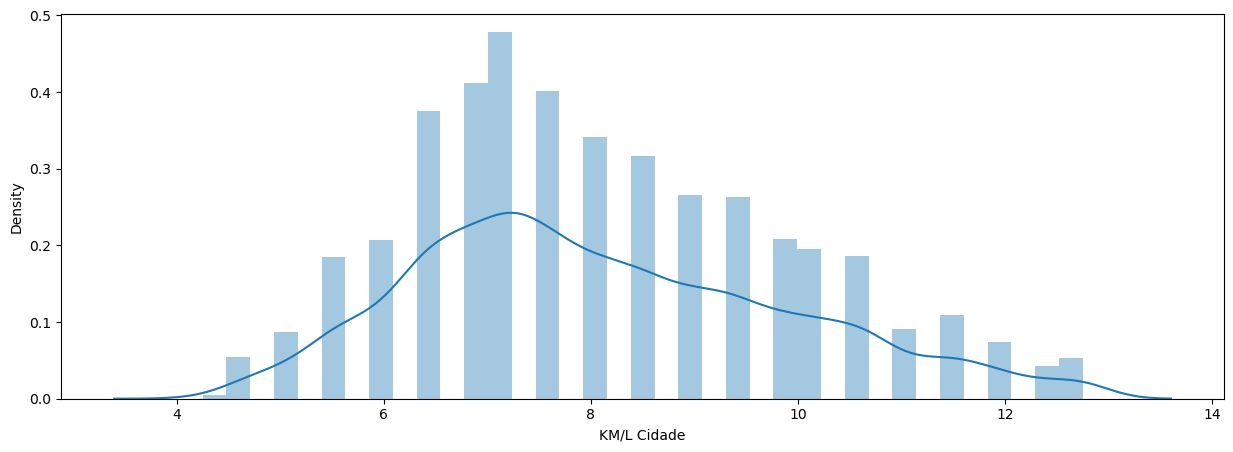

In [38]:
histograma(base_carros['KM/L Cidade'])
print(base_carros.shape)

### Popularidade

Vamos excluir a coluna "popularidade" pois ela não possui uma métrica específica para descrever os valores. Acreditamos que essa coluna poderá atrapalhar nosso modelo na previsão do preço.

In [39]:
display(base_carros)
base_carros = base_carros.drop('Popularidade', axis=1)

display(base_carros)

,Fabricante,Modelo,Ano,Tipo de Combustivel,Motor HP,Nº de Cilindros,Tipo Transmissão,Tração,Nº de Portas,Tamanho Veículo,Estilo Veículo,KM/L Estrada,KM/L Cidade,Popularidade,Preço Sugerido Fabricante
0,BMW,1 Series M,2011,Gasolina Premium Obrigatoria,335.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.05,8.08,3916,226673.49
1,BMW,1 Series,2011,Gasolina Premium Obrigatoria,300.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Conversível,11.90,8.08,3916,199724.23
2,BMW,1 Series,2011,Gasolina Premium Obrigatoria,300.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.90,8.50,3916,178597.19
3,BMW,1 Series,2011,Gasolina Premium Obrigatoria,230.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.90,7.65,3916,144695.66
4,BMW,1 Series,2011,Gasolina Premium Obrigatoria,230.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Conversível,11.90,7.65,3916,169507.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,226599.80
11910,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,278434.74
11911,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,248709.49
11912,Acura,ZDX,2013,Gasolina Premium Recomendada,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,204,250183.47


,Fabricante,Modelo,Ano,Tipo de Combustivel,Motor HP,Nº de Cilindros,Tipo Transmissão,Tração,Nº de Portas,Tamanho Veículo,Estilo Veículo,KM/L Estrada,KM/L Cidade,Preço Sugerido Fabricante
0,BMW,1 Series M,2011,Gasolina Premium Obrigatoria,335.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.05,8.08,226673.49
1,BMW,1 Series,2011,Gasolina Premium Obrigatoria,300.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Conversível,11.90,8.08,199724.23
2,BMW,1 Series,2011,Gasolina Premium Obrigatoria,300.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.90,8.50,178597.19
3,BMW,1 Series,2011,Gasolina Premium Obrigatoria,230.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Cupê,11.90,7.65,144695.66
4,BMW,1 Series,2011,Gasolina Premium Obrigatoria,230.0,6.0,MANUAL,tracao traseira,2.0,Pequeno,Conversível,11.90,7.65,169507.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,226599.80
11910,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,278434.74
11911,Acura,ZDX,2012,Gasolina Premium Obrigatoria,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,248709.49
11912,Acura,ZDX,2013,Gasolina Premium Recomendada,300.0,6.0,Automático,tracao em todas as rodas,4.0,Medio,Hatchback de 4 portas,9.78,6.80,250183.47


### Ano

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


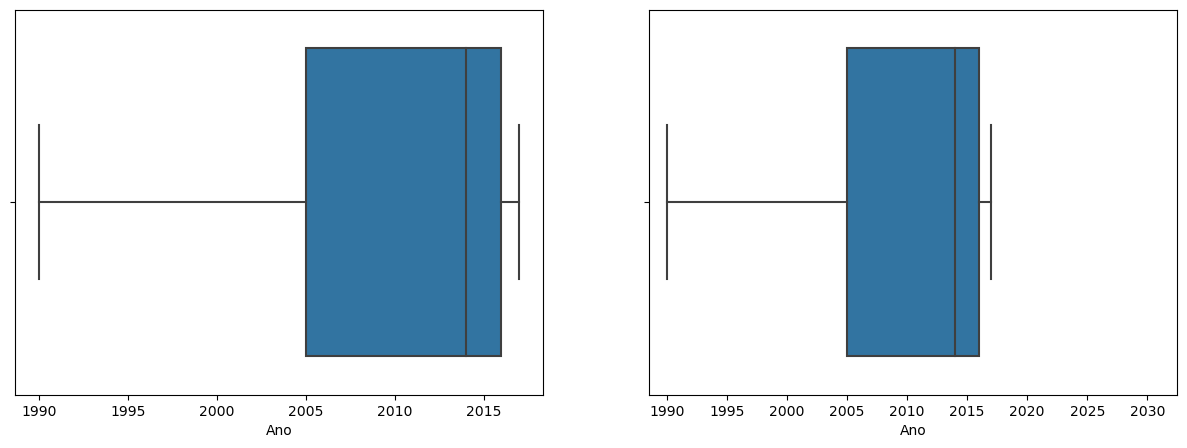

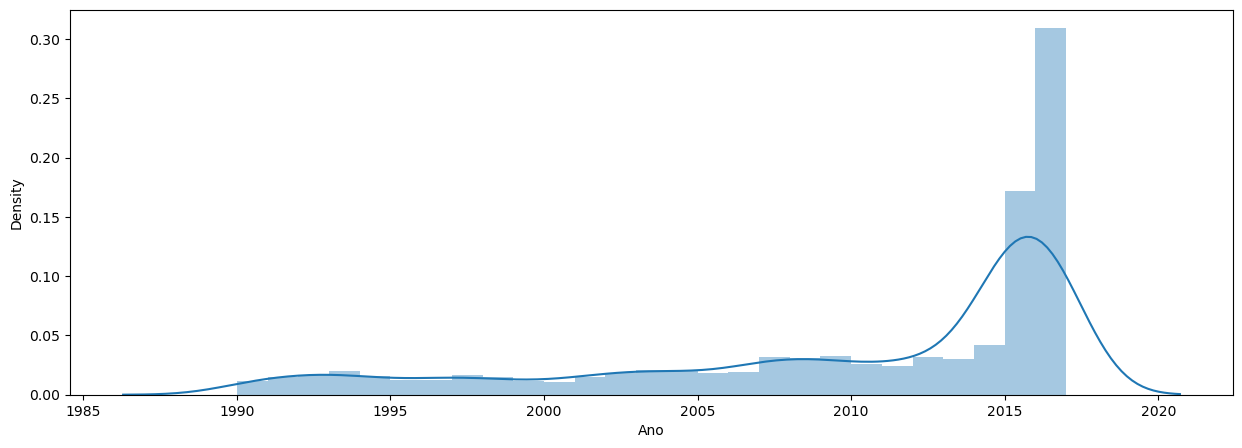

In [40]:
diagrama_caixa(base_carros['Ano'])
histograma(base_carros['Ano'])


In [41]:
base_carros, linhas_removidas = excluir_outliers(base_carros, 'Ano')
print('{} linhas removidas'.format(linhas_removidas))

0 linhas removidas


- Coluna Ano sem outliers.

### Tratando Colunas de Valores de Texto

### Fabricante

Chevrolet        1047
Ford              830
Volkswagen        760
Toyota            670
Dodge             585
GMC               515
Nissan            513
Mazda             399
Honda             350
Suzuki            343
Infiniti          329
Cadillac          299
Hyundai           294
Volvo             281
Audi              270
Subaru            256
Acura             245
Mercedes-Benz     233
BMW               226
Kia               218
Buick             196
Mitsubishi        193
Chrysler          187
Pontiac           186
Lexus             159
Oldsmobile        150
Lincoln           147
Saab              111
Land Rover         94
Plymouth           82
Scion              54
FIAT               46
Porsche            40
Lotus              18
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Fabricante, dtype: int64


C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


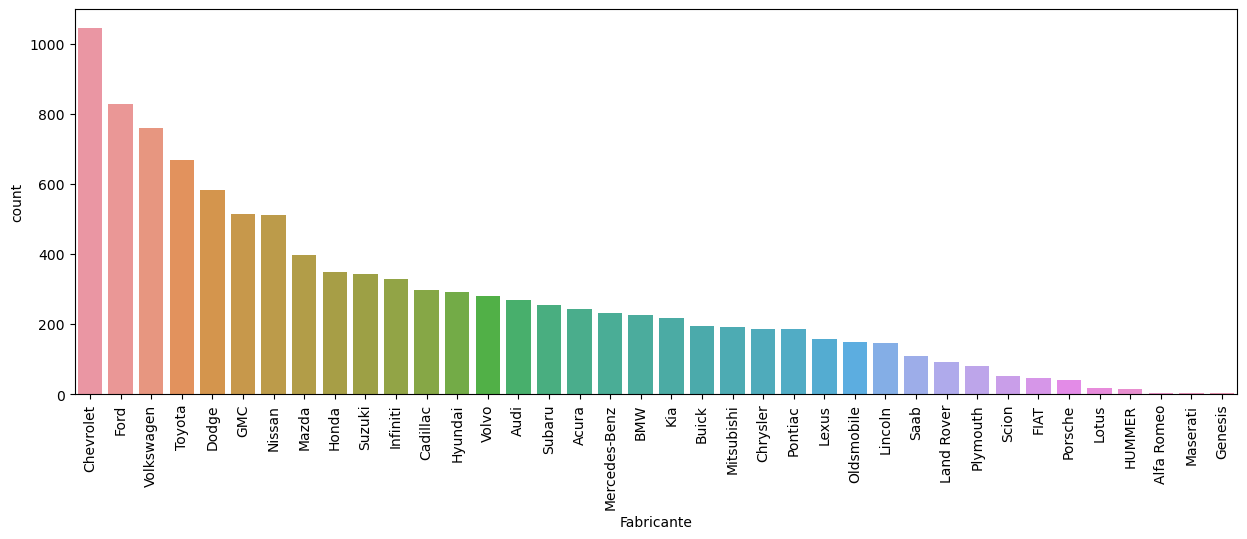

In [42]:
print(base_carros['Fabricante'].value_counts())


grafico_contagem(base_carros, base_carros['Fabricante'], 'Fabricante')

- A idéia aqui não é excluir outliers e sim excluir valores muito pequenos.
Todos fabricantes de carros que tem a marca abaixo de 200, vamos agrupar em um grupo chamado 'Outros'

Chevrolet        1047
Ford              830
Volkswagen        760
Toyota            670
Dodge             585
GMC               515
Nissan            513
Mazda             399
Honda             350
Suzuki            343
Infiniti          329
Cadillac          299
Hyundai           294
Volvo             281
Audi              270
Subaru            256
Acura             245
Mercedes-Benz     233
BMW               226
Kia               218
Buick             196
Mitsubishi        193
Chrysler          187
Pontiac           186
Lexus             159
Oldsmobile        150
Lincoln           147
Saab              111
Land Rover         94
Plymouth           82
Scion              54
FIAT               46
Porsche            40
Lotus              18
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Fabricante, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


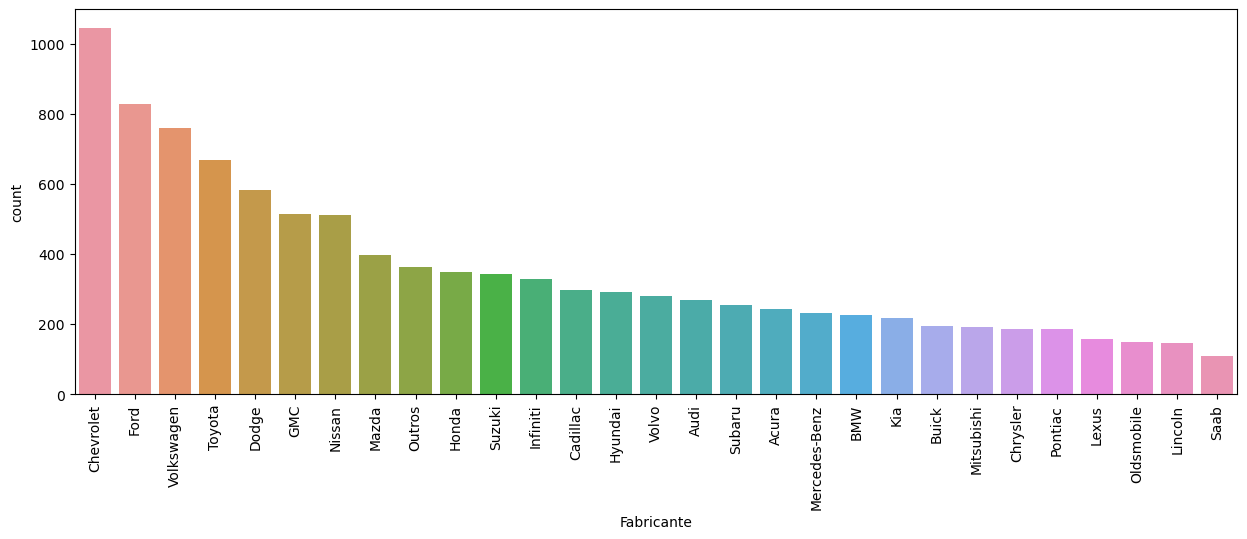

In [43]:
tabela_nomes_marcas = base_carros['Fabricante'].value_counts()
colunas_agrupar = []
display(tabela_nomes_marcas)

for nome_marca in tabela_nomes_marcas.index:
    if tabela_nomes_marcas[nome_marca] < 100:
        colunas_agrupar.append(nome_marca)
        
for nome_marca in colunas_agrupar:
    base_carros.loc[base_carros['Fabricante'] == nome_marca, 'Fabricante'] = 'Outros'


grafico_contagem(base_carros, base_carros['Fabricante'], 'Fabricante')

### Modelo



Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
                     ... 
S60 Cross Country       1
Sierra C3               1
Sigma                   1
Sixty Special           1
Zephyr                  1
Name: Modelo, Length: 743, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


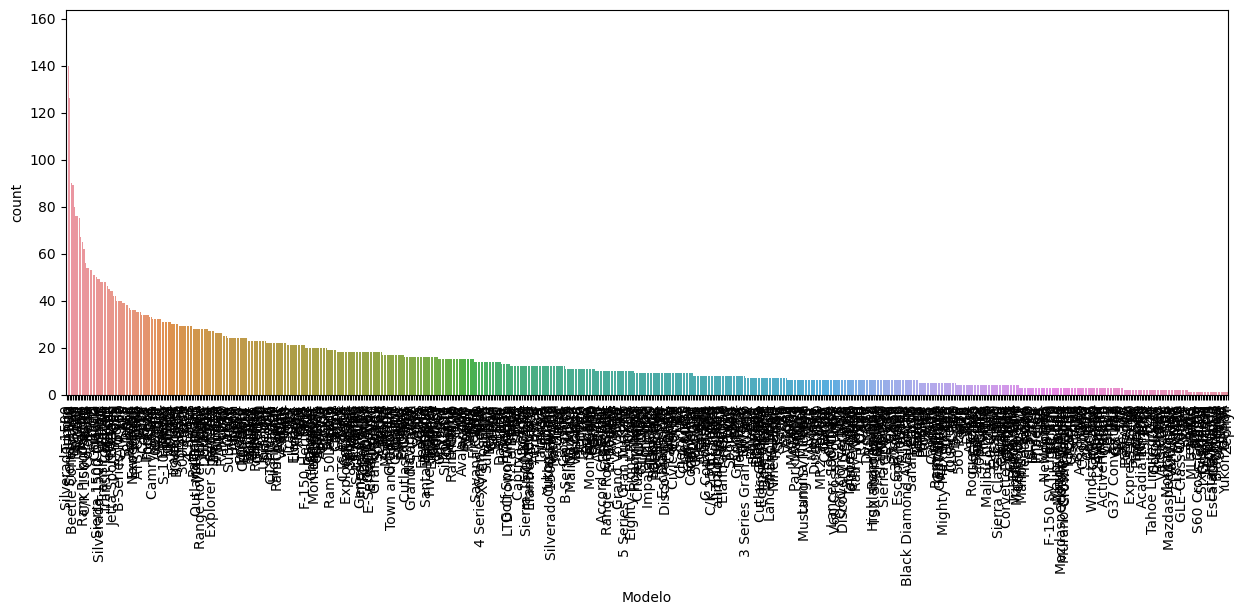

In [44]:
nomes_modelo = base_carros['Modelo'].value_counts()
display(nomes_modelo)

grafico_contagem(base_carros, base_carros['Modelo'], 'Modelo')

 - Na coluna "Modelo", foi identificado que existem muitos modelos e muitos valores quebrados. Com isso, nosso modelo não ficará tão assertivo. Vamos agrupar todos os modelos cujos valores sejam menores ou iguais a 5 na categoria "Outros".

Outros             589
Silverado 1500     156
Tundra             140
F-150              126
Sierra 1500         90
                  ... 
Prizm                6
Q60 Convertible      6
QX4                  6
Astro Cargo          6
QX80                 6
Name: Modelo, Length: 546, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


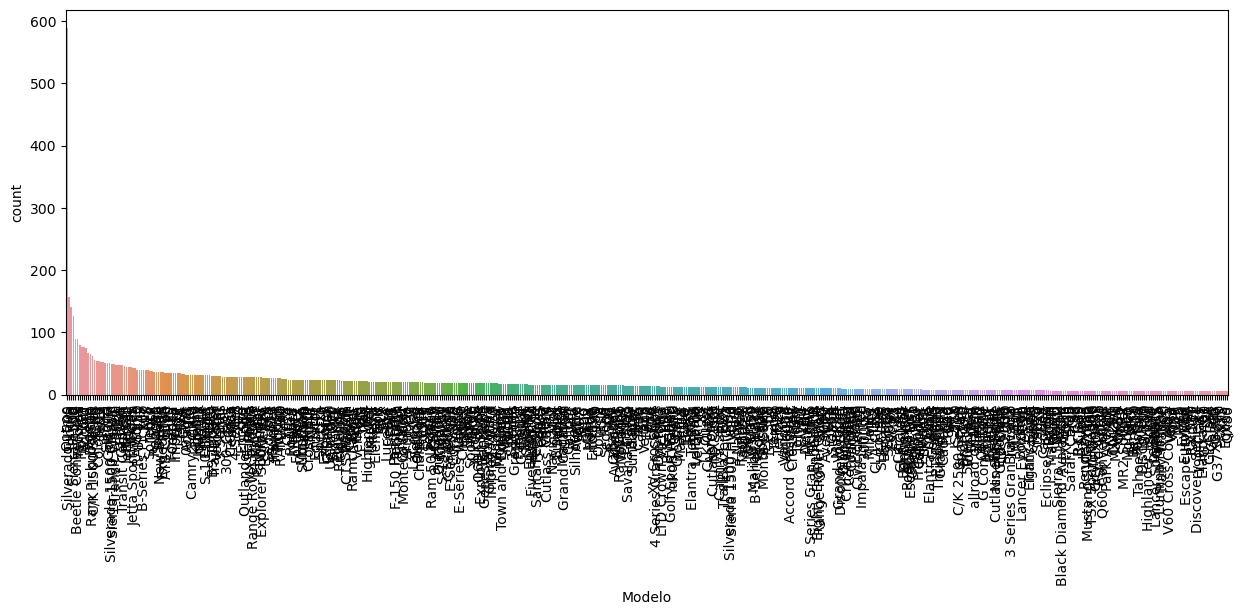

In [45]:
colunas_agrupar = []

for nome in nomes_modelo.index:
    if nomes_modelo[nome] <= 5:
        colunas_agrupar.append(nome)



for nome in colunas_agrupar:
    base_carros.loc[base_carros['Modelo'] == nome, 'Modelo'] = 'Outros'
    
    
display(base_carros['Modelo'].value_counts())


grafico_contagem(base_carros, base_carros['Modelo'], 'Modelo')



### Tipo de Combustivel

Gasolina Comum                  6813
Gasolina Premium Recomendada    1384
Gasolina Premium Obrigatoria    1144
Flex 01 (Gasolina / Etanol)      873
diesel                           109
Flex 02 (Gasolina / Etanol)       26
Flex 03(Gasolina / Etanol)         4
Gas Natural                        2
Name: Tipo de Combustivel, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


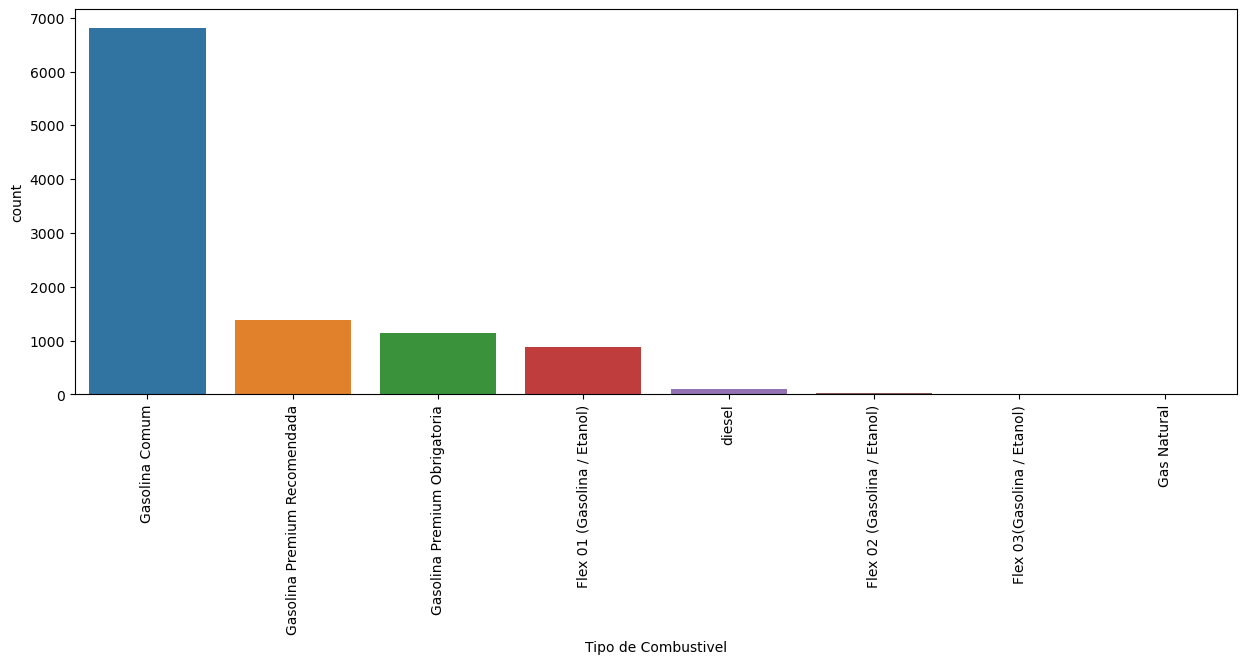

In [46]:
nomes_combustivel = base_carros['Tipo de Combustivel'].value_counts()
display(nomes_combustivel)

grafico_contagem(base_carros, base_carros['Tipo de Combustivel'], 'Tipo de Combustivel')

- As categorias de gasolina e Flex sao muito parecidas , entao vamos agrupa-las 

Gasolina Comum                  6813
Gasolina Premium Recomendada    1384
Gasolina Premium Obrigatoria    1144
Flex                             903
diesel                           109
Gas Natural                        2
Name: Tipo de Combustivel, dtype: int64

Gasolina       9341
Flex            903
diesel          109
Gas Natural       2
Name: Tipo de Combustivel, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


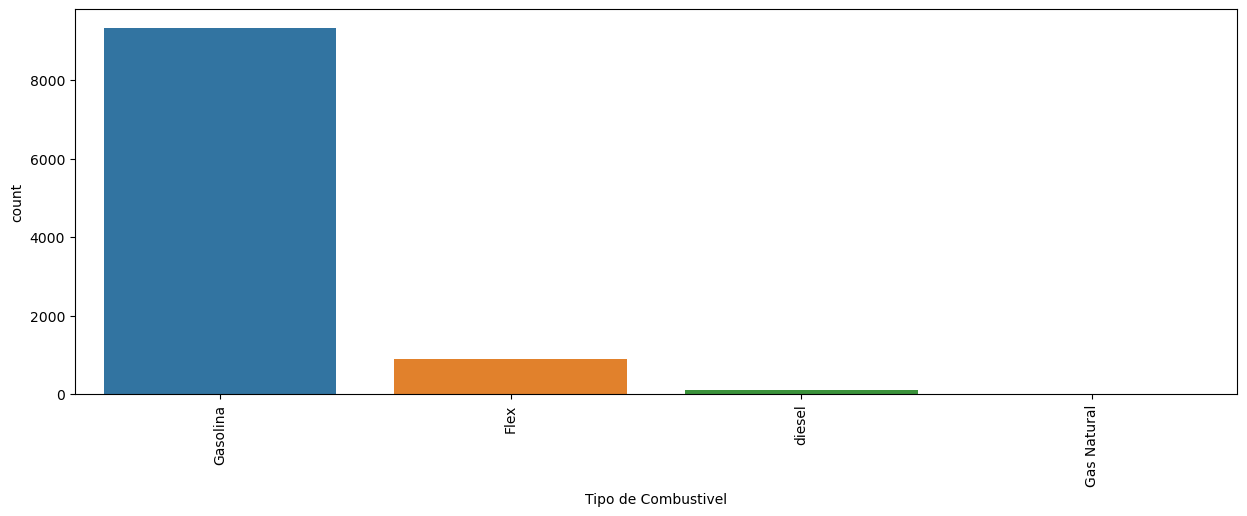

In [47]:
def agrupar_flex(valor):
    if 'Flex' in valor:
        return 'Flex'
    else:
        return valor
    
    
def agrupar_gasolina(valor):
    if 'Gasolina' in valor:
        return 'Gasolina'
    else:
        return valor
    
    
base_carros['Tipo de Combustivel'] = base_carros['Tipo de Combustivel'].map(agrupar_flex)
display(base_carros['Tipo de Combustivel'].value_counts())

base_carros['Tipo de Combustivel'] = base_carros['Tipo de Combustivel'].map(agrupar_gasolina)
display(base_carros['Tipo de Combustivel'].value_counts())

grafico_contagem(base_carros, base_carros['Tipo de Combustivel'], 'Tipo de Combustivel')

### Tipo Transmissão

- Na coluna 'Tipo Transmissão', há uma categoria chamada 'Desconhecido' que parece não ter sido preenchida. Portanto, vamos removê-la, pois certamente irá prejudicar nosso modelo.

Automático             7356
MANUAL                 2596
Automático e Manual     384
Desconhecido             19
Name: Tipo Transmissão, dtype: int64

Automático             7356
MANUAL                 2596
Automático e Manual     384
Name: Tipo Transmissão, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


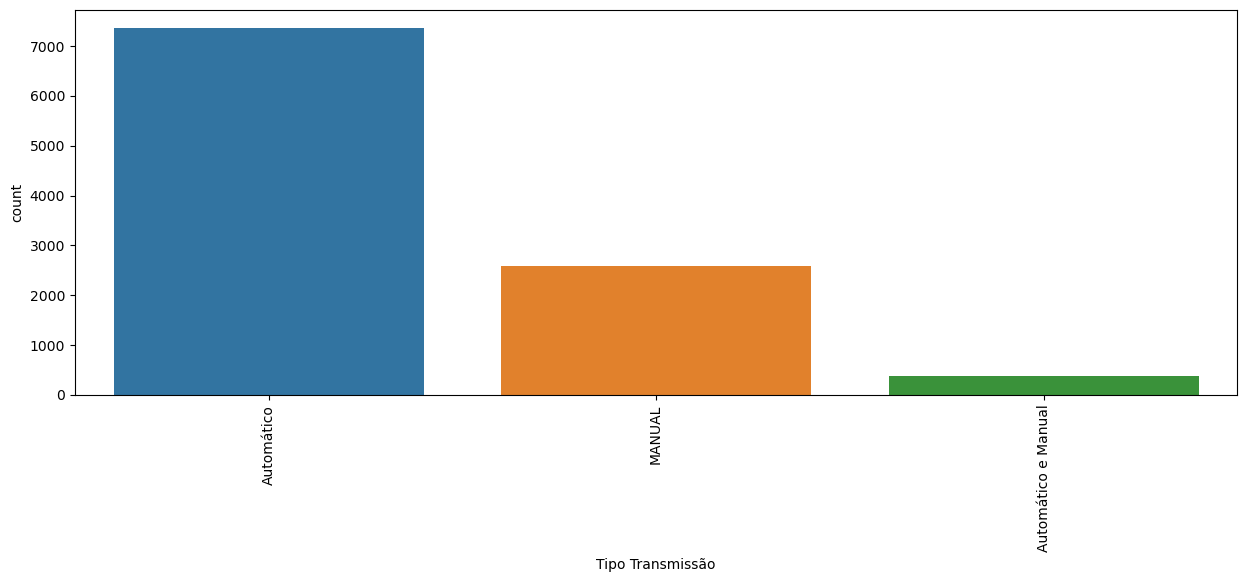

In [48]:
display(base_carros['Tipo Transmissão'].value_counts())


base_carros = base_carros[base_carros['Tipo Transmissão'] != 'Desconhecido']

display(base_carros['Tipo Transmissão'].value_counts())
grafico_contagem(base_carros, base_carros['Tipo Transmissão'], 'Tipo Transmissão')

### Tração

tracao dianteira            4361
tracao traseira             2688
tracao em todas as rodas    1987
tracao nas 4 rodas          1300
Name: Tração, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


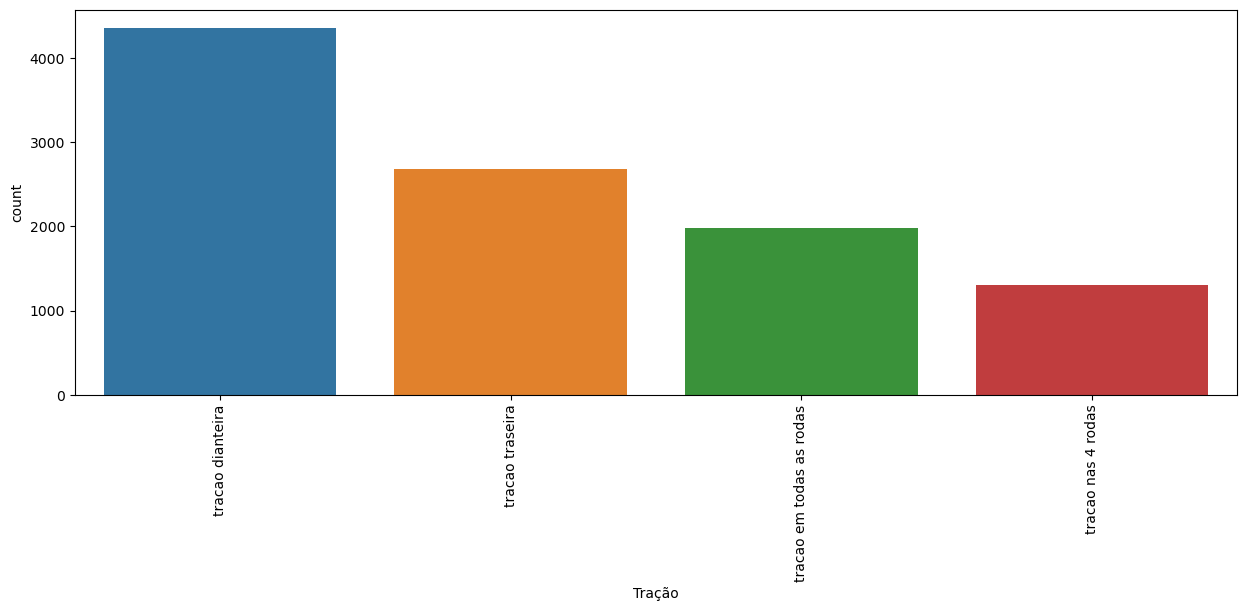

In [49]:
display(base_carros['Tração'].value_counts())
grafico_contagem(base_carros, base_carros['Tração'], 'Tração')

- As categorias 'tracao em todas as rodas' e 'tracao nas 4 rodas' são parecidas . Vamos juntá - las em uma só.

tracao dianteira            4361
tracao traseira             2688
tracao em todas as rodas    1987
tracao nas 4 rodas          1300
Name: Tração, dtype: int64

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


tracao dianteira     4361
tracao em 4 rodas    3287
tracao traseira      2688
Name: Tração, dtype: int64

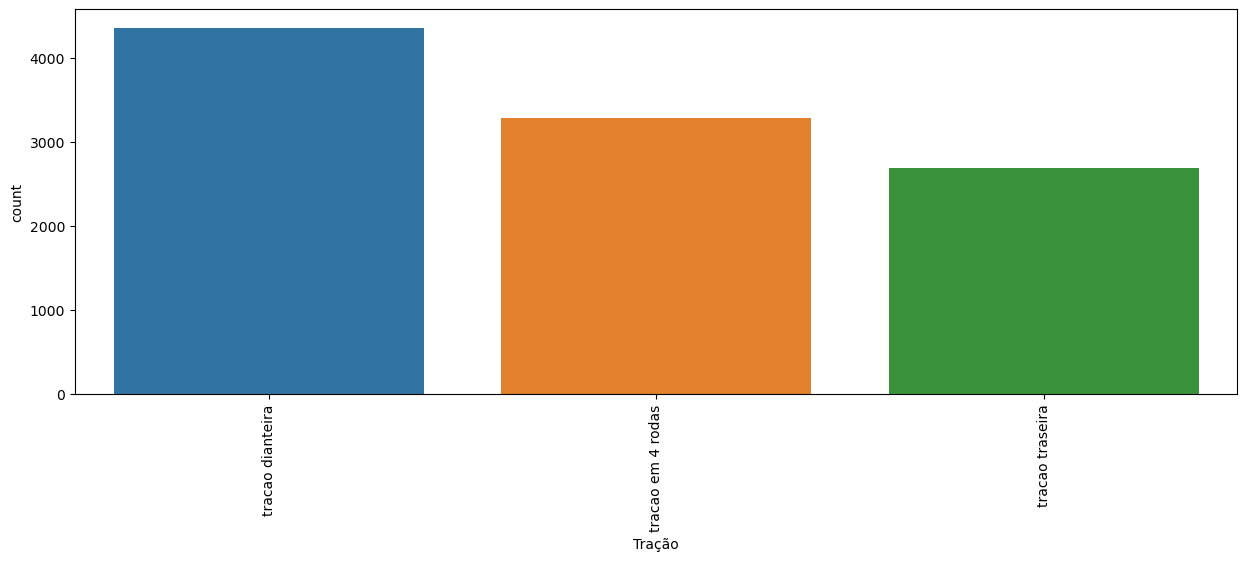

In [50]:
tabela_tracao = base_carros['Tração'].value_counts()
colunas_agrupar = []
display(tabela_tracao)

for nome_tracao in tabela_tracao.index:
    if tabela_tracao[nome_tracao] == 1987:
        colunas_agrupar.append(nome_tracao)
        
    elif tabela_tracao[nome_tracao] == 1300:
        colunas_agrupar.append(nome_tracao)
        
for nome_tracao in colunas_agrupar:
    base_carros.loc[base_carros['Tração'] == nome_tracao, 'Tração'] = 'tracao em 4 rodas'


grafico_contagem(base_carros, base_carros['Tração'], 'Tração')
display(base_carros['Tração'].value_counts())

### Tamanho Veículo

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


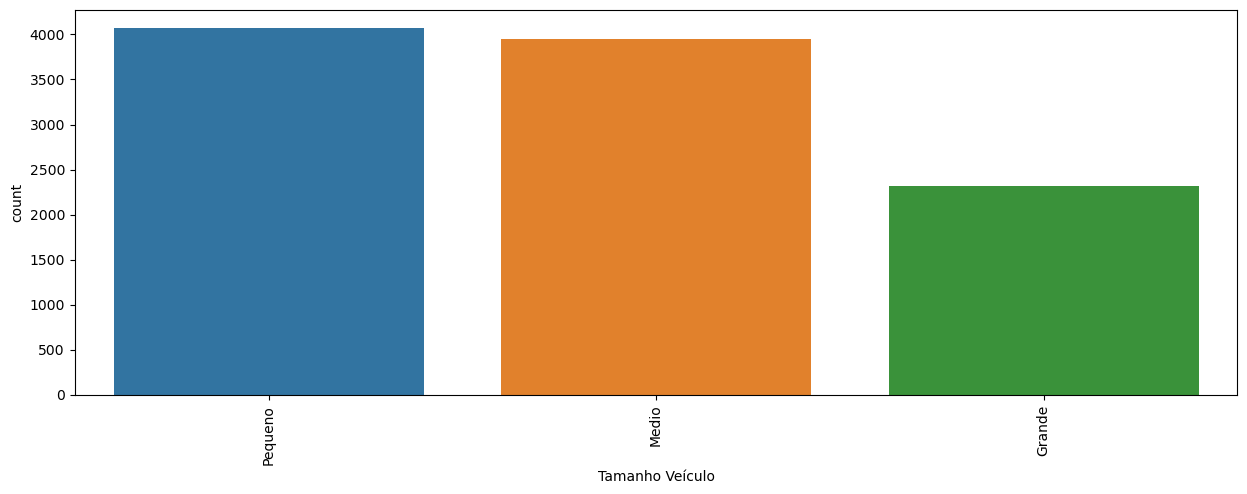

In [51]:
grafico_contagem(base_carros, base_carros['Tamanho Veículo'], 'Tamanho Veículo')

A coluna 'Tamanho do veículo' está bem distribuída. Vamos seguir em frente.

### Estilo Veículo

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sedã                       2607
SUV de 4 portas            2284
Cupê                        796
Picape Cabine Dupla         681
Picape Cabine Estendida     623
Perua                       557
Hatchback de 4 portas       552
Conversível                 536
Hatchback de 2 portas       448
Minivan de Passageiros      412
Picape Cabine Simples       384
SUV de 2 portas             134
Van de Passageiros          128
Van de Carga                 95
Minivan de Carga             70
SUV Conversível              29
Name: Estilo Veículo, dtype: int64

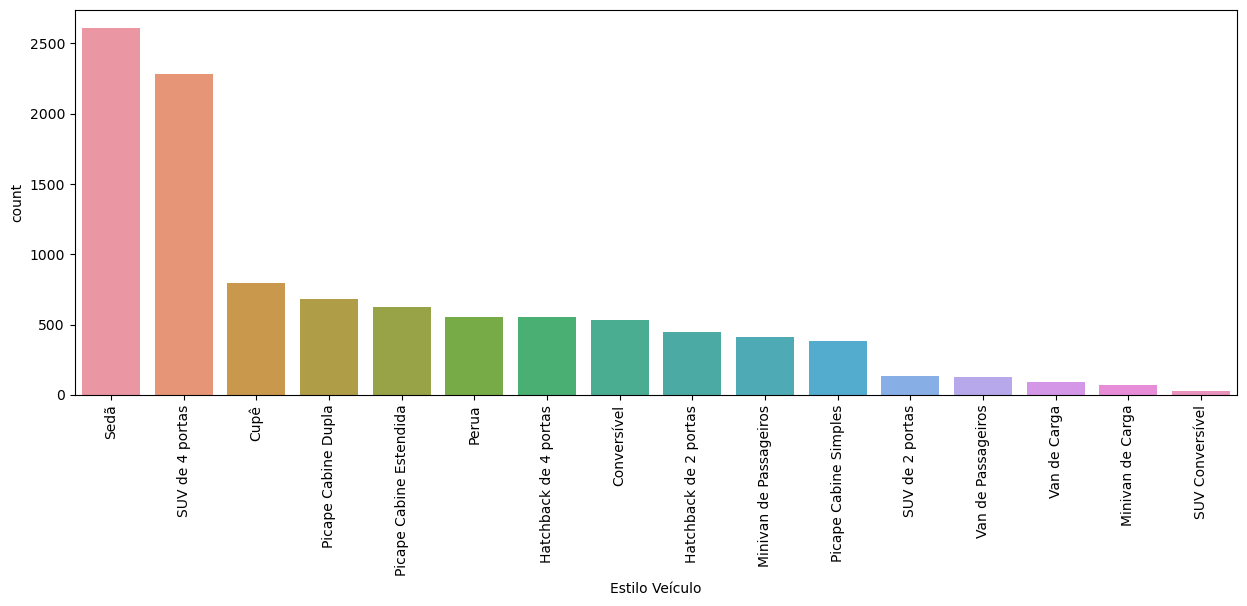

In [52]:
grafico_contagem(base_carros, base_carros['Estilo Veículo'], 'Estilo Veículo')

display(base_carros['Estilo Veículo'].value_counts())

- Vamos simplificar a coluna 'Estilo Veículo' agrupando as categorias menores que 200 em 'Outros'

C:\Users\AndersonPC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Sedã                       2607
SUV de 4 portas            2284
Cupê                        796
Picape Cabine Dupla         681
Picape Cabine Estendida     623
Perua                       557
Hatchback de 4 portas       552
Conversível                 536
Outros                      456
Hatchback de 2 portas       448
Minivan de Passageiros      412
Picape Cabine Simples       384
Name: Estilo Veículo, dtype: int64

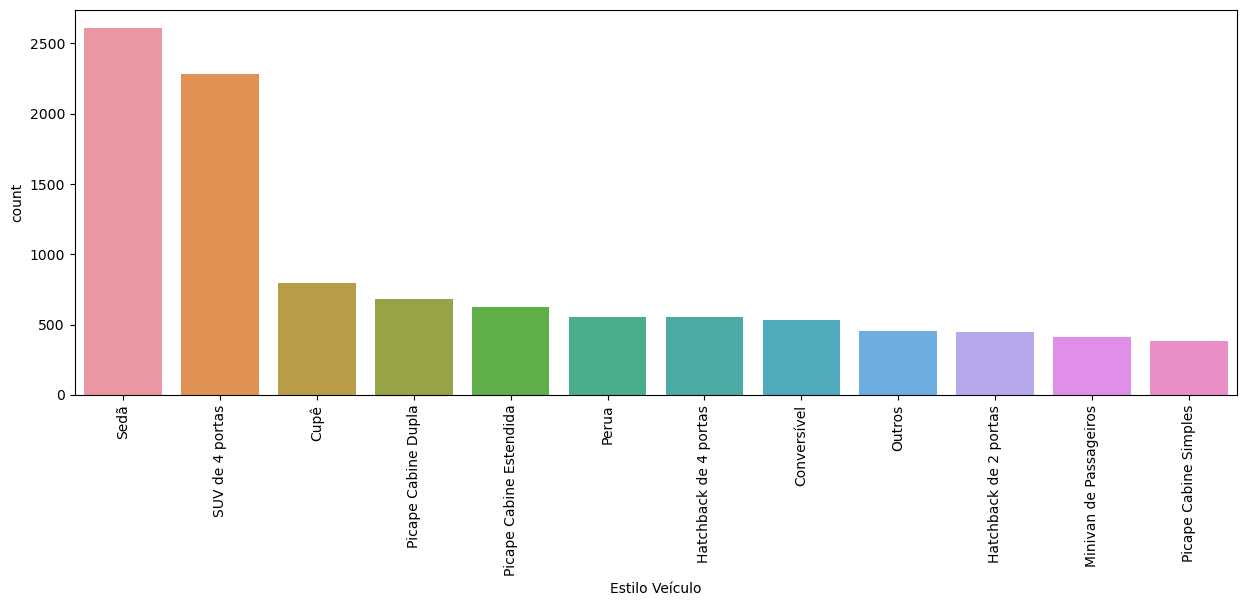

In [53]:
tabela_estilos =  base_carros['Estilo Veículo'].value_counts()

colunas_agrupar = []

for nome_estilos in tabela_estilos.index:
    if tabela_estilos[nome_estilos] < 200:
        colunas_agrupar.append(nome_estilos)

        
for nome_estilos in colunas_agrupar:
    base_carros.loc[base_carros['Estilo Veículo'] == nome_estilos, 'Estilo Veículo'] = 'Outros'
    

grafico_contagem(base_carros, base_carros['Estilo Veículo'], 'Estilo Veículo')
display(base_carros['Estilo Veículo'].value_counts())

### Encoding

Precisamos Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria.)


- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

In [54]:
display(base_carros.shape)
display(base_carros.dtypes)
base_carros_cod = base_carros.copy()

colunas_categorias = ['Fabricante', 'Modelo', 'Tipo de Combustivel', 'Tipo Transmissão', 'Tração', 'Tamanho Veículo', 'Estilo Veículo']
base_carros_cod = pd.get_dummies(data=base_carros_cod, columns=colunas_categorias)
display(base_carros_cod.shape)

(10336, 14)

Fabricante                    object
Modelo                        object
Ano                            int64
Tipo de Combustivel           object
Motor HP                     float64
Nº de Cilindros              float64
Tipo Transmissão              object
Tração                        object
Nº de Portas                 float64
Tamanho Veículo               object
Estilo Veículo                object
KM/L Estrada                 float64
KM/L Cidade                  float64
Preço Sugerido Fabricante    float64
dtype: object

(10336, 607)

### Modelo de Previsão (6 - Modelagem + Algoritmos)

Vamos usar aqui o R² que vai nos dizer o quão bem o nosso modelo consegue explicar o preço. Isso será um ótimo parâmetro para ver o quão bom é nosso modelo <br>
-> Quanto mais próximo de 100%, melhor

Vamos calcular também o Erro Quadrático Médio, que vai mostrar para gente o quanto o nosso modelo está errando. <br>
-> Quanto menor for o erro, melhor

In [55]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²: {r2:.2%}\nRMSE: {RSME:.2f}'




- Escolha dos Modelos a Serem Testados
    1. RandomForest
    2. LinearRegression
    3. Extra Tree
    
Esses são alguns dos modelos que existem para fazer previsão de valores numéricos (o que chamamos de regressão). Estamos querendo calcular o preço, portanto, queremos prever um valor numérico.

Assim, escolheremos esses 3 modelos.

In [56]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()

modelos = {'RandomForest': modelo_rf,
           'LinearRegression': modelo_lr,
           'ExtraTrees': modelo_et,  }


y = base_carros_cod['Preço Sugerido Fabricante']
X = base_carros_cod.drop('Preço Sugerido Fabricante', axis=1)
                    
                    


- Separar os dados em treino e teste + Treino do Modelo

Essa etapa é crucial. As Inteligências Artificiais aprendendo com o que chamamos de treino.

Basicamente o que a gente faz é: a gente separa as informações em treino e teste, ex: 10% da base de dados vai servir para teste e 90% para treino (normalmente treino é maior mesmo)

Aí, damos para o modelo os dados de treino, ele vai olhar aqueles dados e aprender a prever os preços.

Depois que ele aprende, você faz um teste com ele, com os dados de teste, para ver se ela está bom ou não. Analisando os dados de teste você descobre o melhor modelo.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²: 95.36%
RMSE: 16858.94
Modelo LinearRegression:
R²: 92.83%
RMSE: 20965.79
Modelo ExtraTrees:
R²: 95.34%
RMSE: 16904.47


### Análise do Melhor Modelo (7 - Interpretação dos Resultados.)

In [58]:
for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))


Modelo RandomForest:
R²: 95.36%
RMSE: 16858.94
Modelo LinearRegression:
R²: 92.83%
RMSE: 20965.79
Modelo ExtraTrees:
R²: 95.34%
RMSE: 16904.47


- Modelo Escolhido como Melhor Modelo: RandomForest
- Modelo com maior r2 e menor RSME.
- Resultados das Métricas de Avaliação no Modelo Vencedor:

Modelo RandomForest:

R²: 95.40%

RMSE: 16789.29



### Ajustes e Melhorias no Modelo

,0
Ano,0.512081
Motor HP,0.339383
Tipo de Combustivel_diesel,0.013194
KM/L Estrada,0.010652
KM/L Cidade,0.009413
...,...
Modelo_Eighty-Eight Royale,0.000000
Modelo_Ninety-Eight,0.000000
Modelo_Navajo,0.000000
Modelo_NX,0.000000


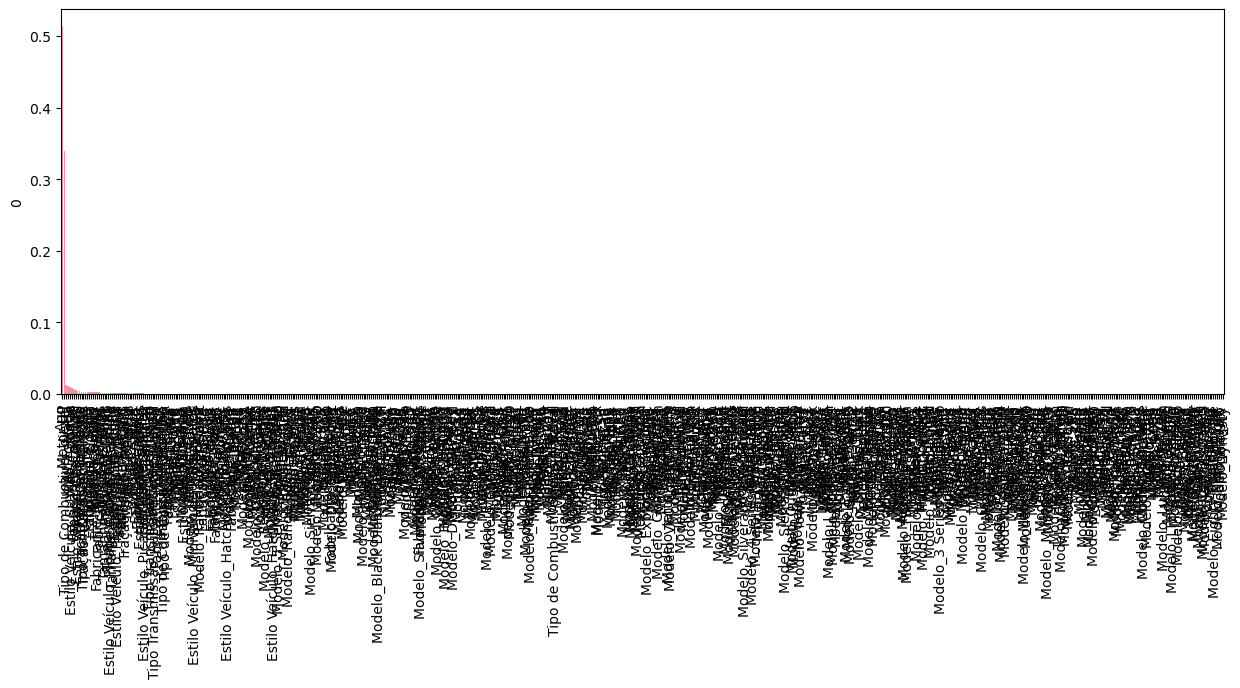

In [59]:
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)

display(importancia_features)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

- vamos salvar a tabela 'importancia_features' num arquivo excel para analisarmos melhor

In [60]:
importancia_features.to_csv('Analise_importancia_features.csv', sep=';', encoding='latin1')

Após a análise qualitativa das features , foi observado que a coluna modelo não está ajudando o nosso modelo em nada e está apenas atrapalhando. Vamos excluir toda feature que contiver a palavra 'Modelo':

In [61]:
display(base_carros_cod.shape)

for feature in base_carros_cod:
    if 'Modelo' in feature:
        base_carros_cod = base_carros_cod.drop(feature, axis=1)
        
display(base_carros_cod.shape)


(10336, 607)

(10336, 61)

In [62]:
y = base_carros_cod['Preço Sugerido Fabricante']
X = base_carros_cod.drop('Preço Sugerido Fabricante', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#treinar
modelo_rf.fit(X_train, y_train)

#testar
previsao = modelo_rf.predict(X_test)
print(avaliar_modelo('RandomForest', y_test, previsao))

Modelo RandomForest:
R²: 95.31%
RMSE: 16961.86


,0
Ano,0.513195
Motor HP,0.344444
KM/L Estrada,0.014076
Tipo de Combustivel_diesel,0.012505
KM/L Cidade,0.011927
Estilo Veículo_SUV de 4 portas,0.009332
Fabricante_Cadillac,0.006860
Fabricante_Outros,0.005953
Estilo Veículo_Conversível,0.004888
Fabricante_Lexus,0.004706


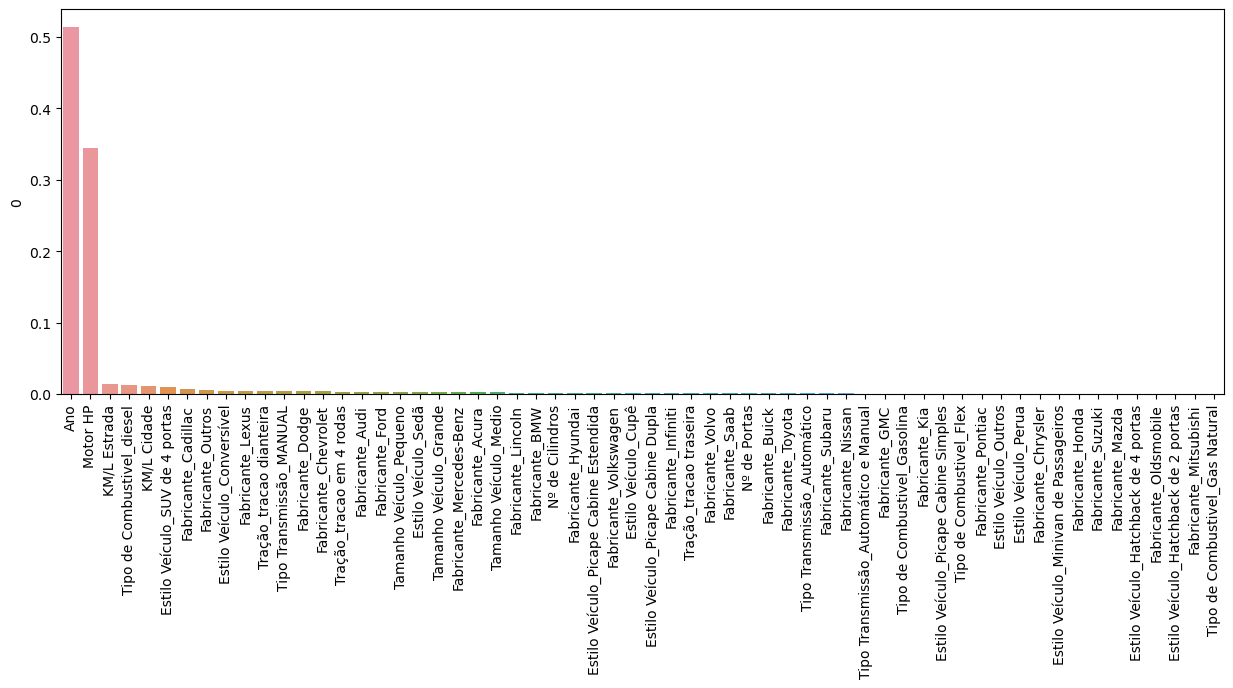

In [63]:
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)

display(importancia_features)

plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x', rotation=90)

### 8 - Deploy do Projeto

1 - Criaremos o arquivo do modelo em joblib.

2 - Usaremos a biblioteca  Streamlit para o deploy.

In [64]:
X['Preço Sugerido Fabricante'] = y
X.to_csv('dados.csv')

display(X.shape)

(10336, 61)

In [65]:
import joblib
joblib.dump(modelo_rf, 'modelo.joblib')

['modelo.joblib']